# 03 ReserveBonus on Normal Agents : ALL

---
## 0. Setup

In [1]:
import numpy as np
np.set_printoptions(precision=3)  # 数値桁数を指定．
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

import importlib
import itertools

import sys
sys.path.append('../../RLPack')
sys.path.append('../')

---
## 1. Environment

In [2]:
import Env_Reserve_RB
importlib.reload(Env_Reserve_RB)

hurdle = 0.05

n_trials = 1
n_steps = 1000

In [3]:
cashflow = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, -10])
interest = 0.01
hurdle = 0.05
initial_cash = 15
bankrupt_penalty = -50
bankrupt_info = False

---
## 2. Normal

In [4]:
env = Env_Reserve_RB.Environment(cashflow=cashflow, 
                              interest=interest, hurdle=hurdle, 
                              initial_cash=initial_cash, bankrupt_penalty=bankrupt_penalty, 
                              bankrupt_info=bankrupt_info, 
                              n_agents=64)

n_trials = 5
n_steps = 10000

df = pd.DataFrame()

/home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
W1107 01:44:59.930077 140098083907392 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1107 01:44:59.930814 140098083907392 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1107 01:44:59.934234 

lr=0.001, eps=0.5, boltzmann=False
start testing... :  2019-11-07 01:45:00.053468
start trial 1/5 trial...


W1107 01:45:00.402799 140098083907392 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

  0%|          | 0/10000 [00:00<?, ?it/s]

start trial 2/5 trial...


  0%|          | 0/10000 [00:00<?, ?it/s]

start trial 3/5 trial...


100%|██████████| 10000/10000 [01:09<00:00, 136.95it/s]


start trial 4/5 trial...


100%|██████████| 10000/10000 [01:11<00:00, 134.25it/s]


start trial 5/5 trial...


100%|██████████| 10000/10000 [01:15<00:00, 126.34it/s]


end testing... :  2019-11-07 01:50:49.256675
loss and reward history


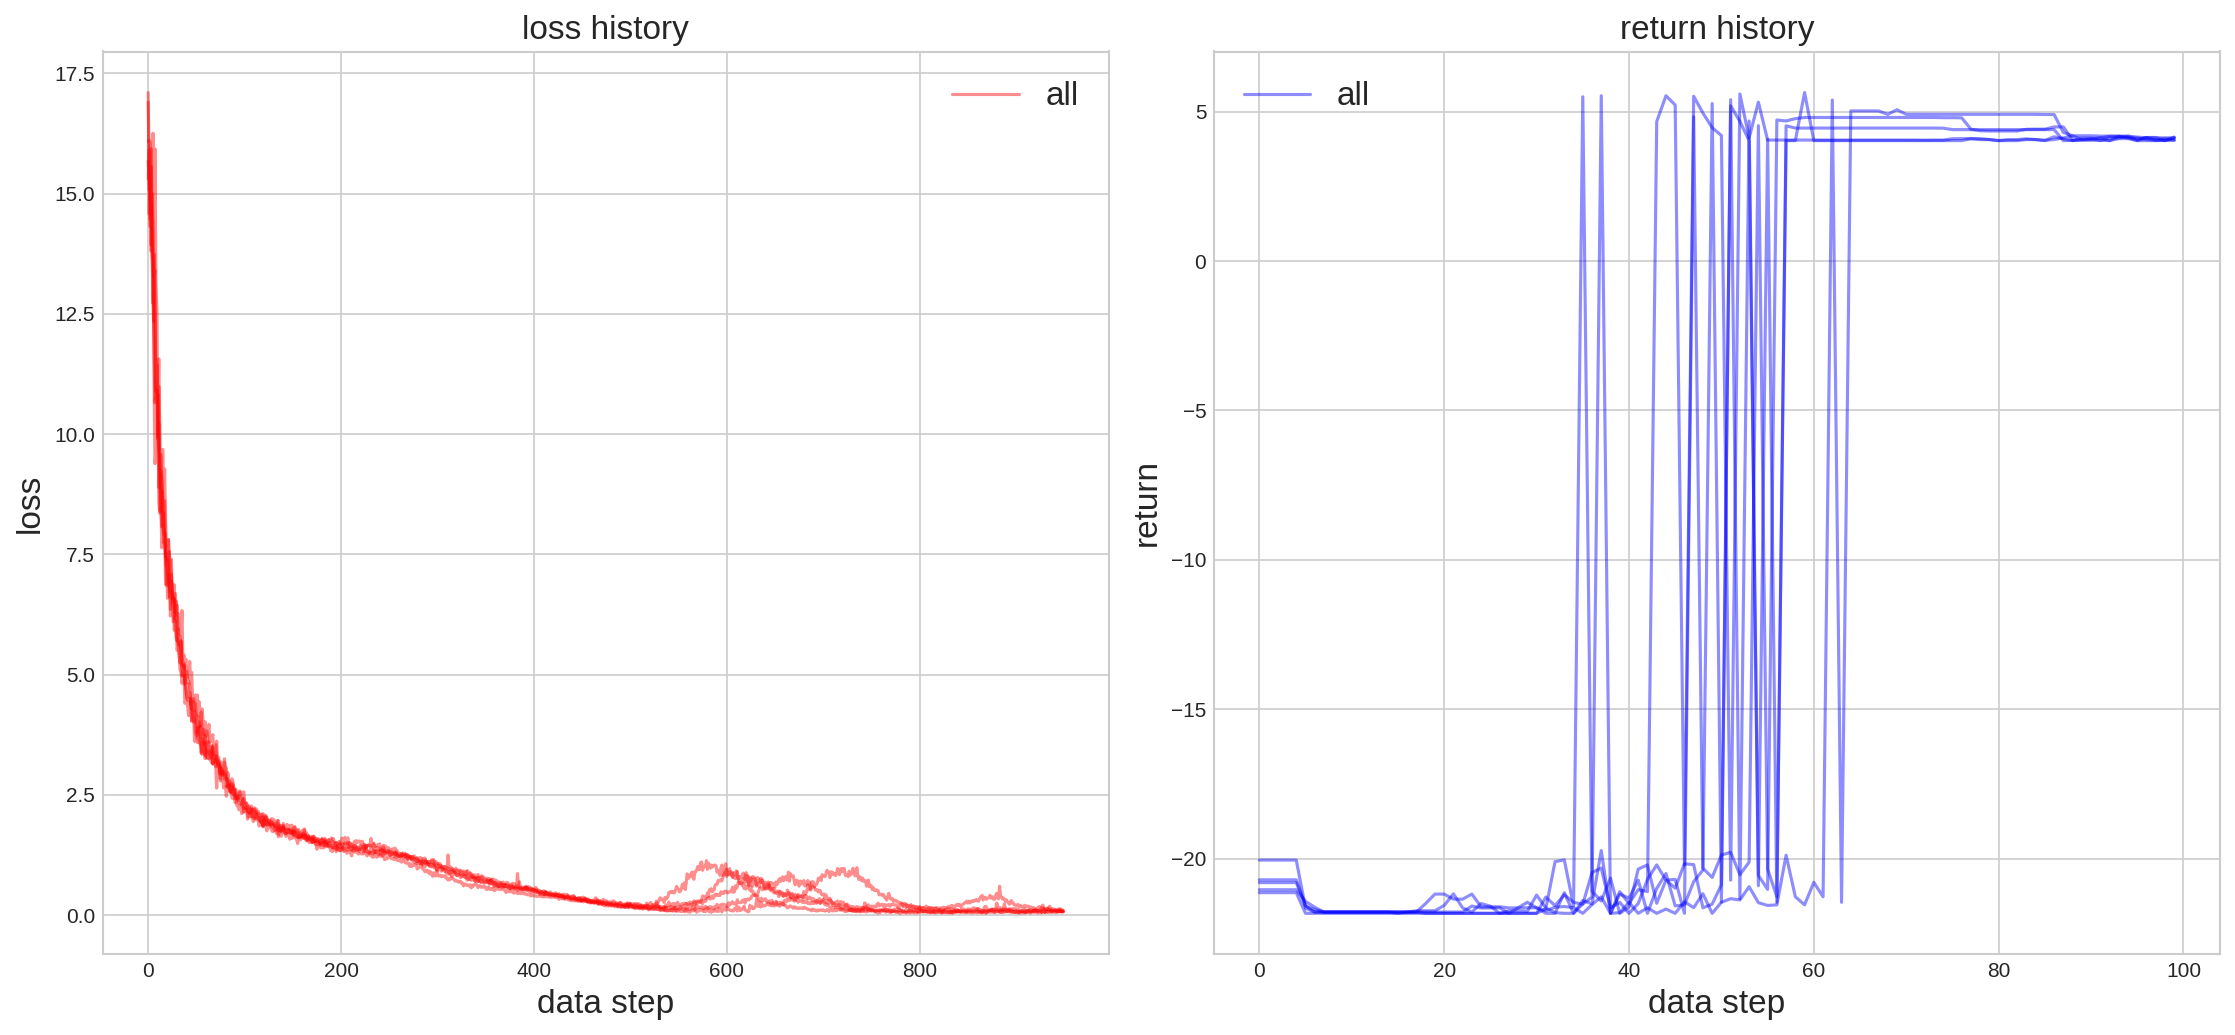

acquired action
action =  [19 19 19 19 19 19 19 19 19 19]
action =  [19 19 19 19 19 19 19 19 19 19]
action =  [19 19 19 19 19 19 19 19 19 19]
action =  [15 15 15 15 15 15 15 15 15 15]
action =  [19 19 19 19 19 19 19 19 19 19]
action =  [17 17 17 17 17 17 17 17 17 17]
action =  [17 17 17 17 17 17 17 17 17 17]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [17 17 17 17 17 17 17 17 17 17]
action =  [17 17 17 17 17 17 17 17 17 17]
return [4.126 4.126 4.126 4.126 4.126 4.126 4.126 4.126 4.126 4.126]
param distribution in model


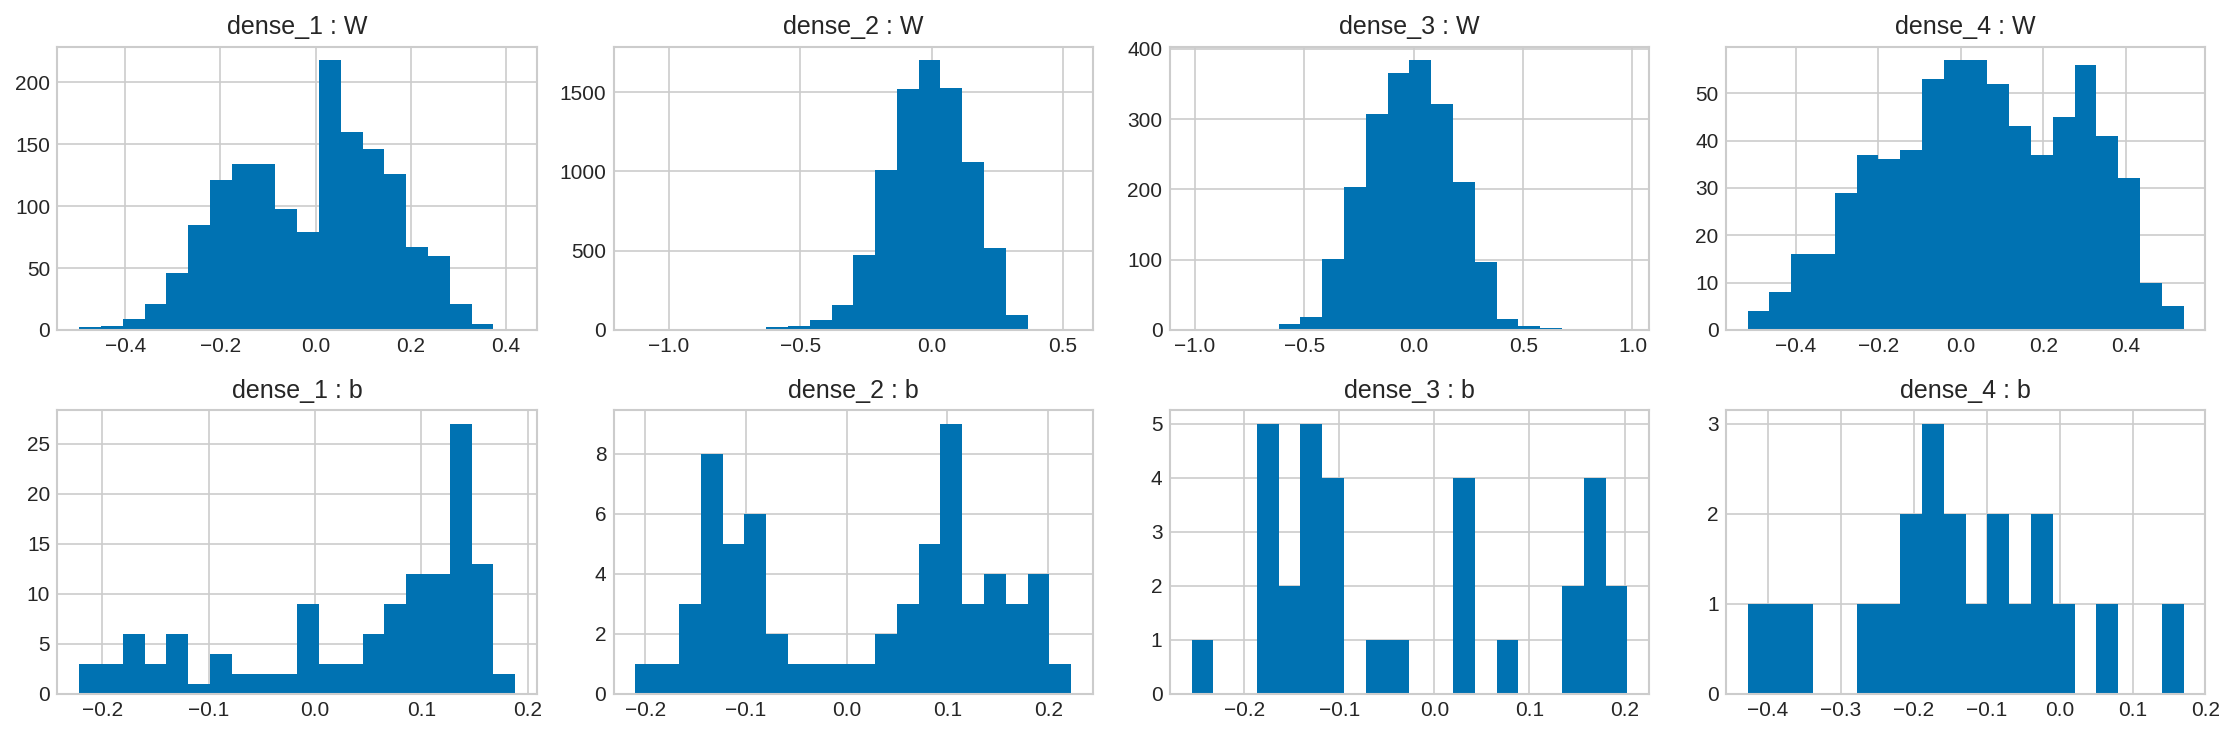

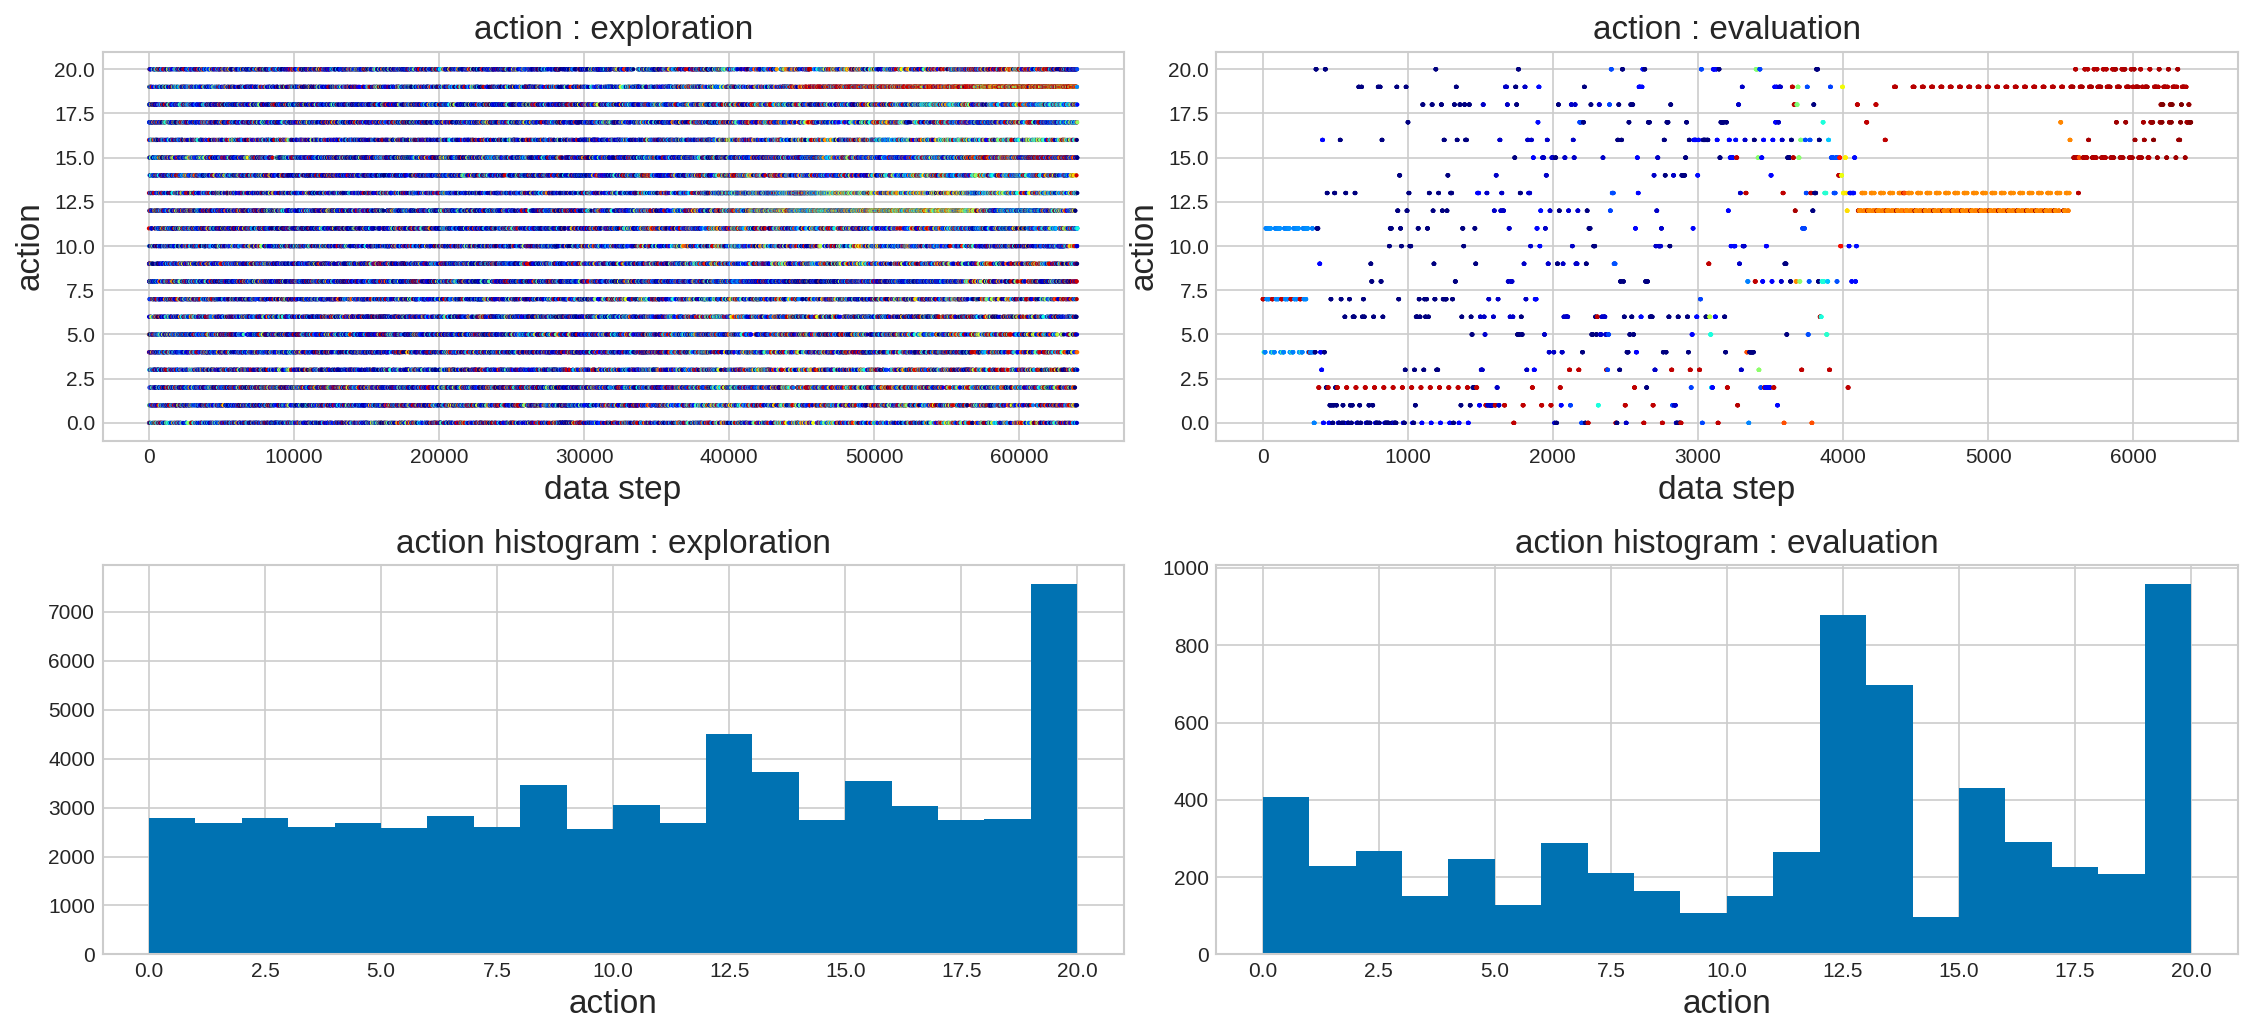

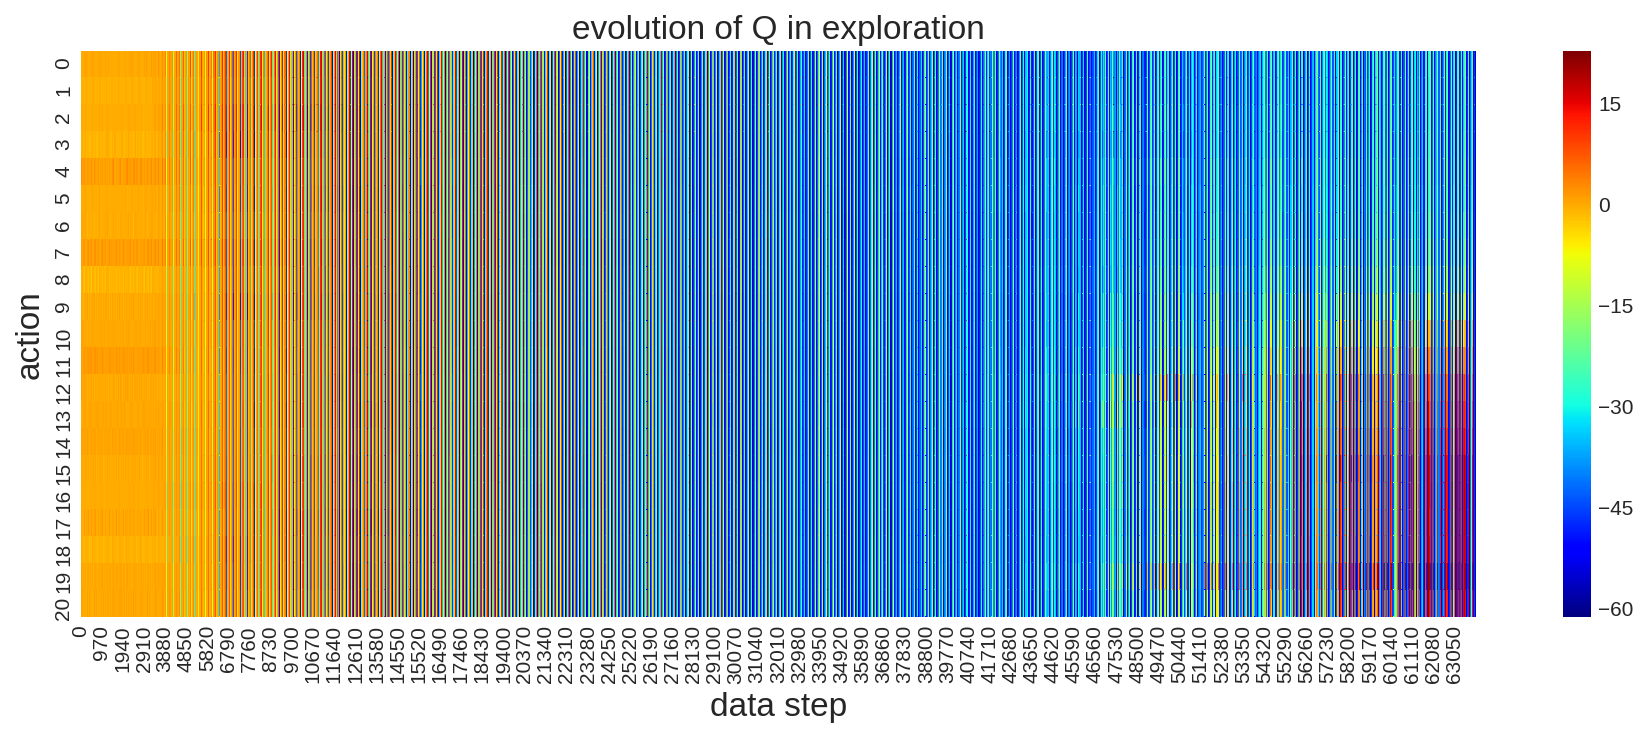

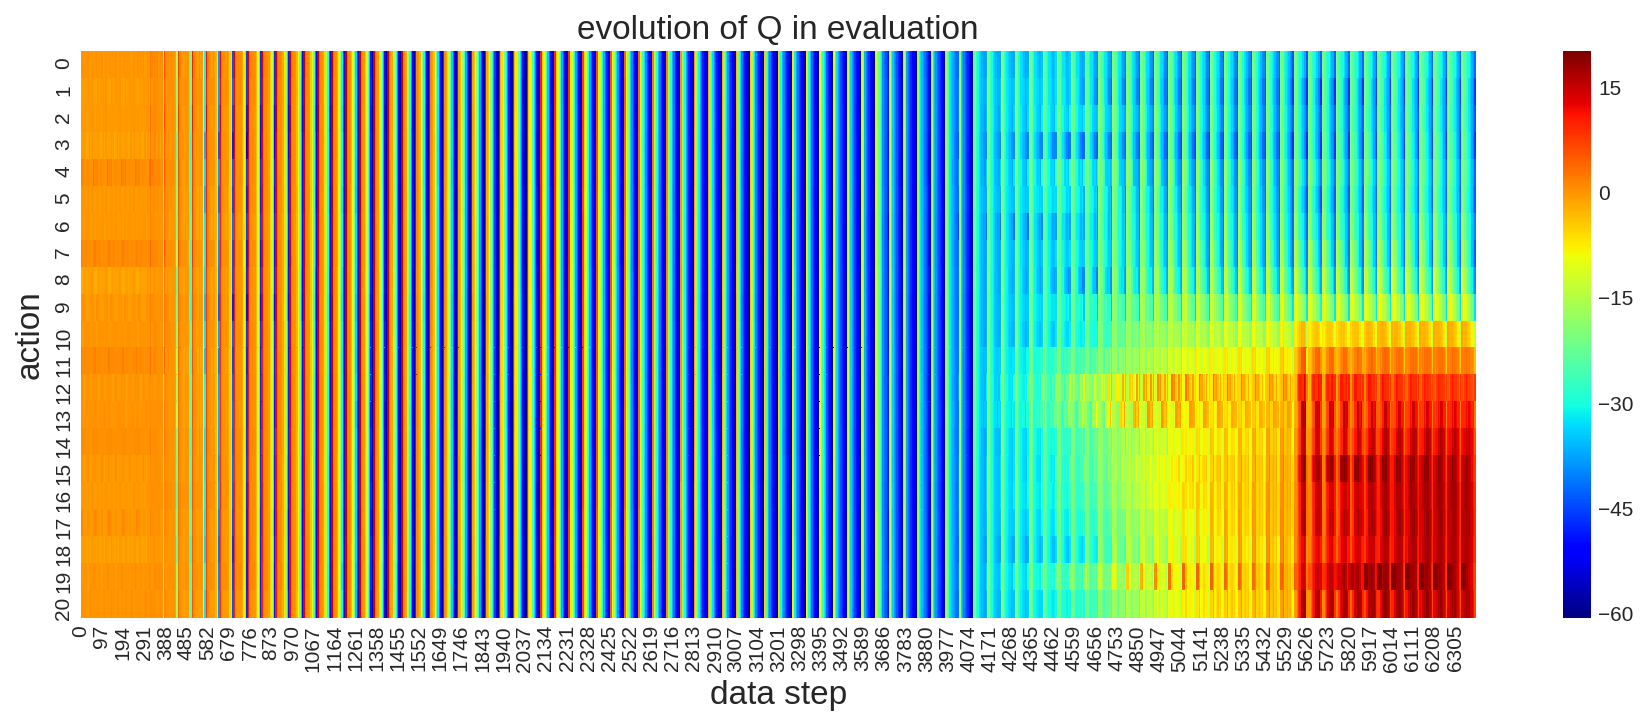

bankrupt=331864, total=352064, ratio=0.9426


In [5]:
import DQN
import importlib
importlib.reload(DQN)  # original DRL code
from keras import optimizers

model = DQN.gen_model(input_shapes=env.shapes(), n_outputs=21, \
                           hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, 
                           duel=False, duel_value_dim=8, duel_advantage_dim=16, 
                           input_reg=False, input_min=0, input_max=1,
                           output_reg=False, output_min=0, output_max=1)

#df = pd.DataFrame()
for lr, eps, boltzmann in itertools.product([1e-3,], [0.5,], [False,]):
    print('======================================================')
    print('lr={}, eps={}, boltzmann={}'
          .format(lr, eps, boltzmann))
    
    tester = DQN.Tester(env, model)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps,
                training_interval=10, n_batches=10, batch_size=256, alpha=1.0, 
                target_update_interval=20, doubleQ=False,
                gamma=1.0/(1+hurdle), optimizer=optimizers.Adam(lr),
                epsilon_start=1.0, epsilon_end=eps, epsilon_interval=n_steps,
                boltzmann=boltzmann, 
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)

    viz = DQN.Visualizer()
    viz.viz_action_history(tester.trainer, lambda x:x[0], 
                           cmap='jet', alpha=1.0, s=1.0)
    viz.viz_Q_history(tester.trainer)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['eps'] = eps
        #df_temp['boltzmann'] = boltzmann
        df_temp['Agent'] = 'DQN'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr=0.01, n_advantages=10, mult_critic=0.1, mult_entropy=0.1
start testing... :  2019-11-07 01:50:57.941626
start 0/5 th trial...


100%|██████████| 10000/10000 [00:41<00:00, 238.39it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [00:43<00:00, 230.89it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [00:45<00:00, 221.51it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [00:45<00:00, 215.05it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [00:46<00:00, 216.23it/s]


end testing... :  2019-11-07 01:54:43.046034
loss and reward history


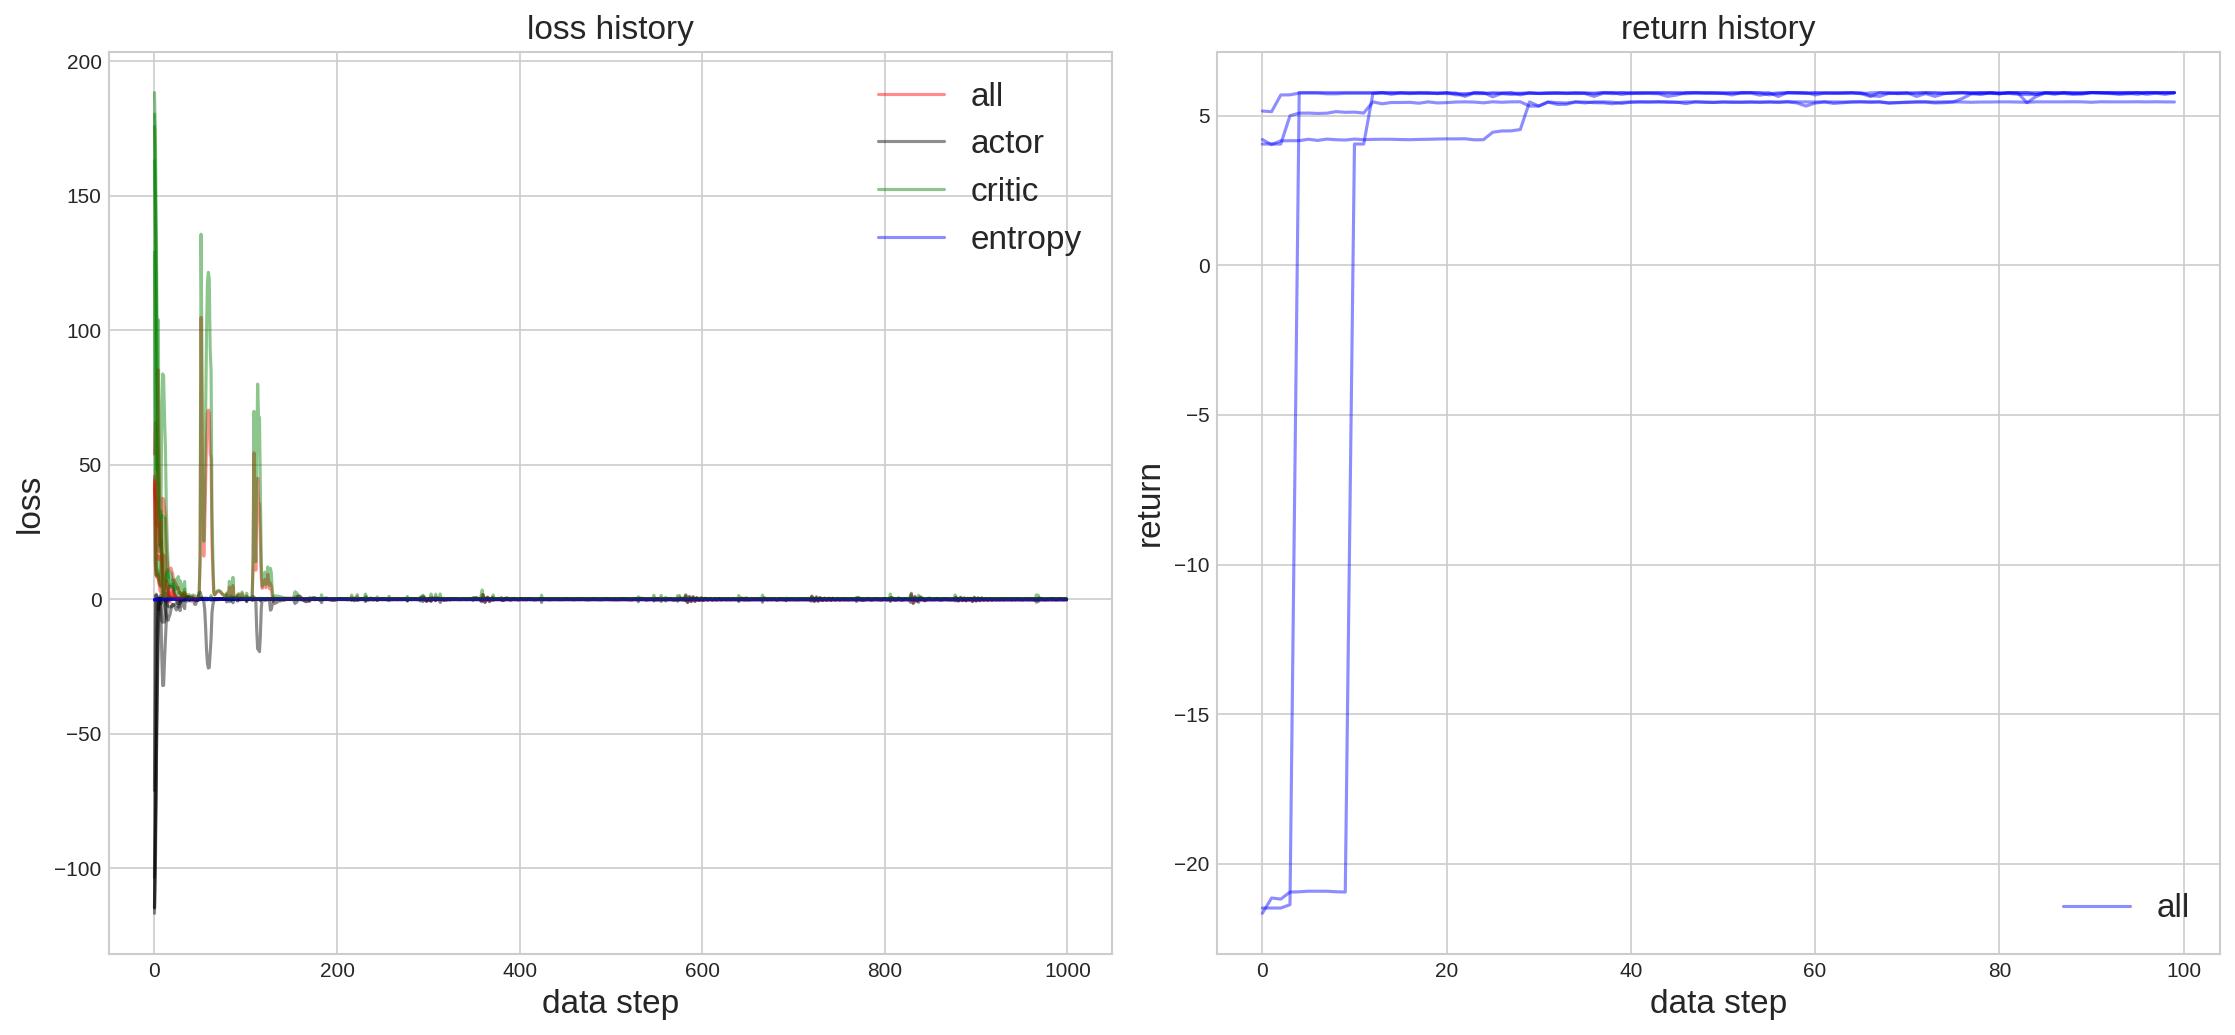

acquired action
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [18 18 18 18 18 18 18 18 18 18]
return [5.767 5.767 5.767 5.767 5.767 5.767 5.767 5.767 5.767 5.767]
param distribution in model


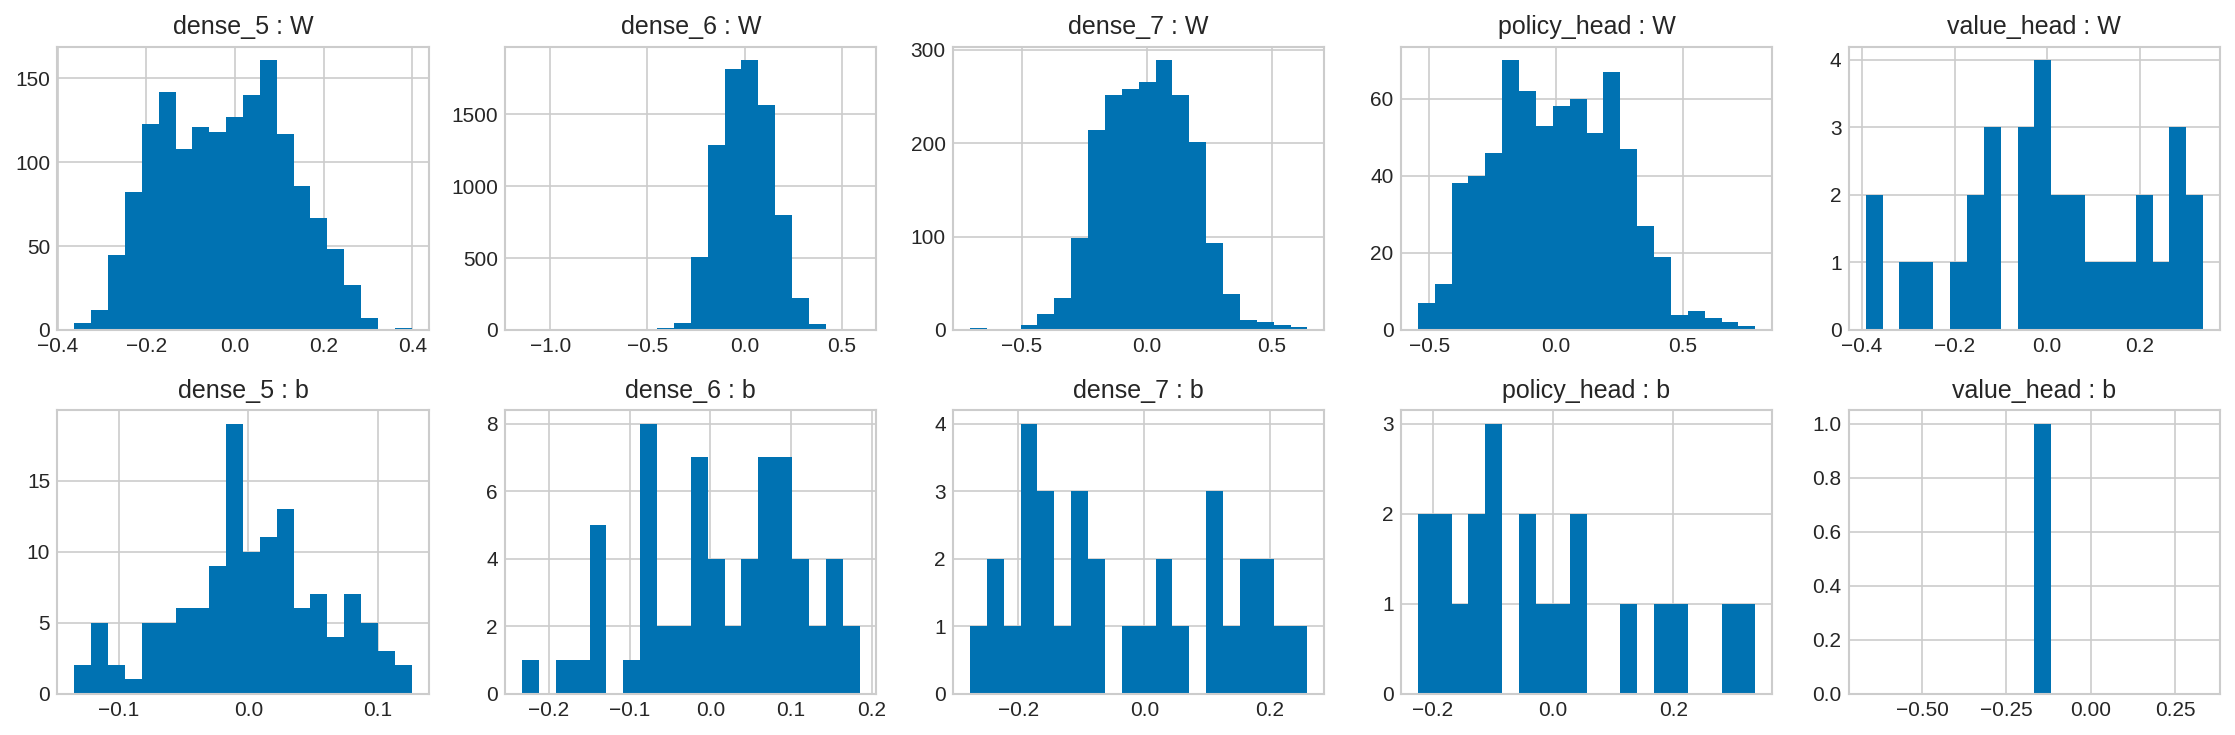

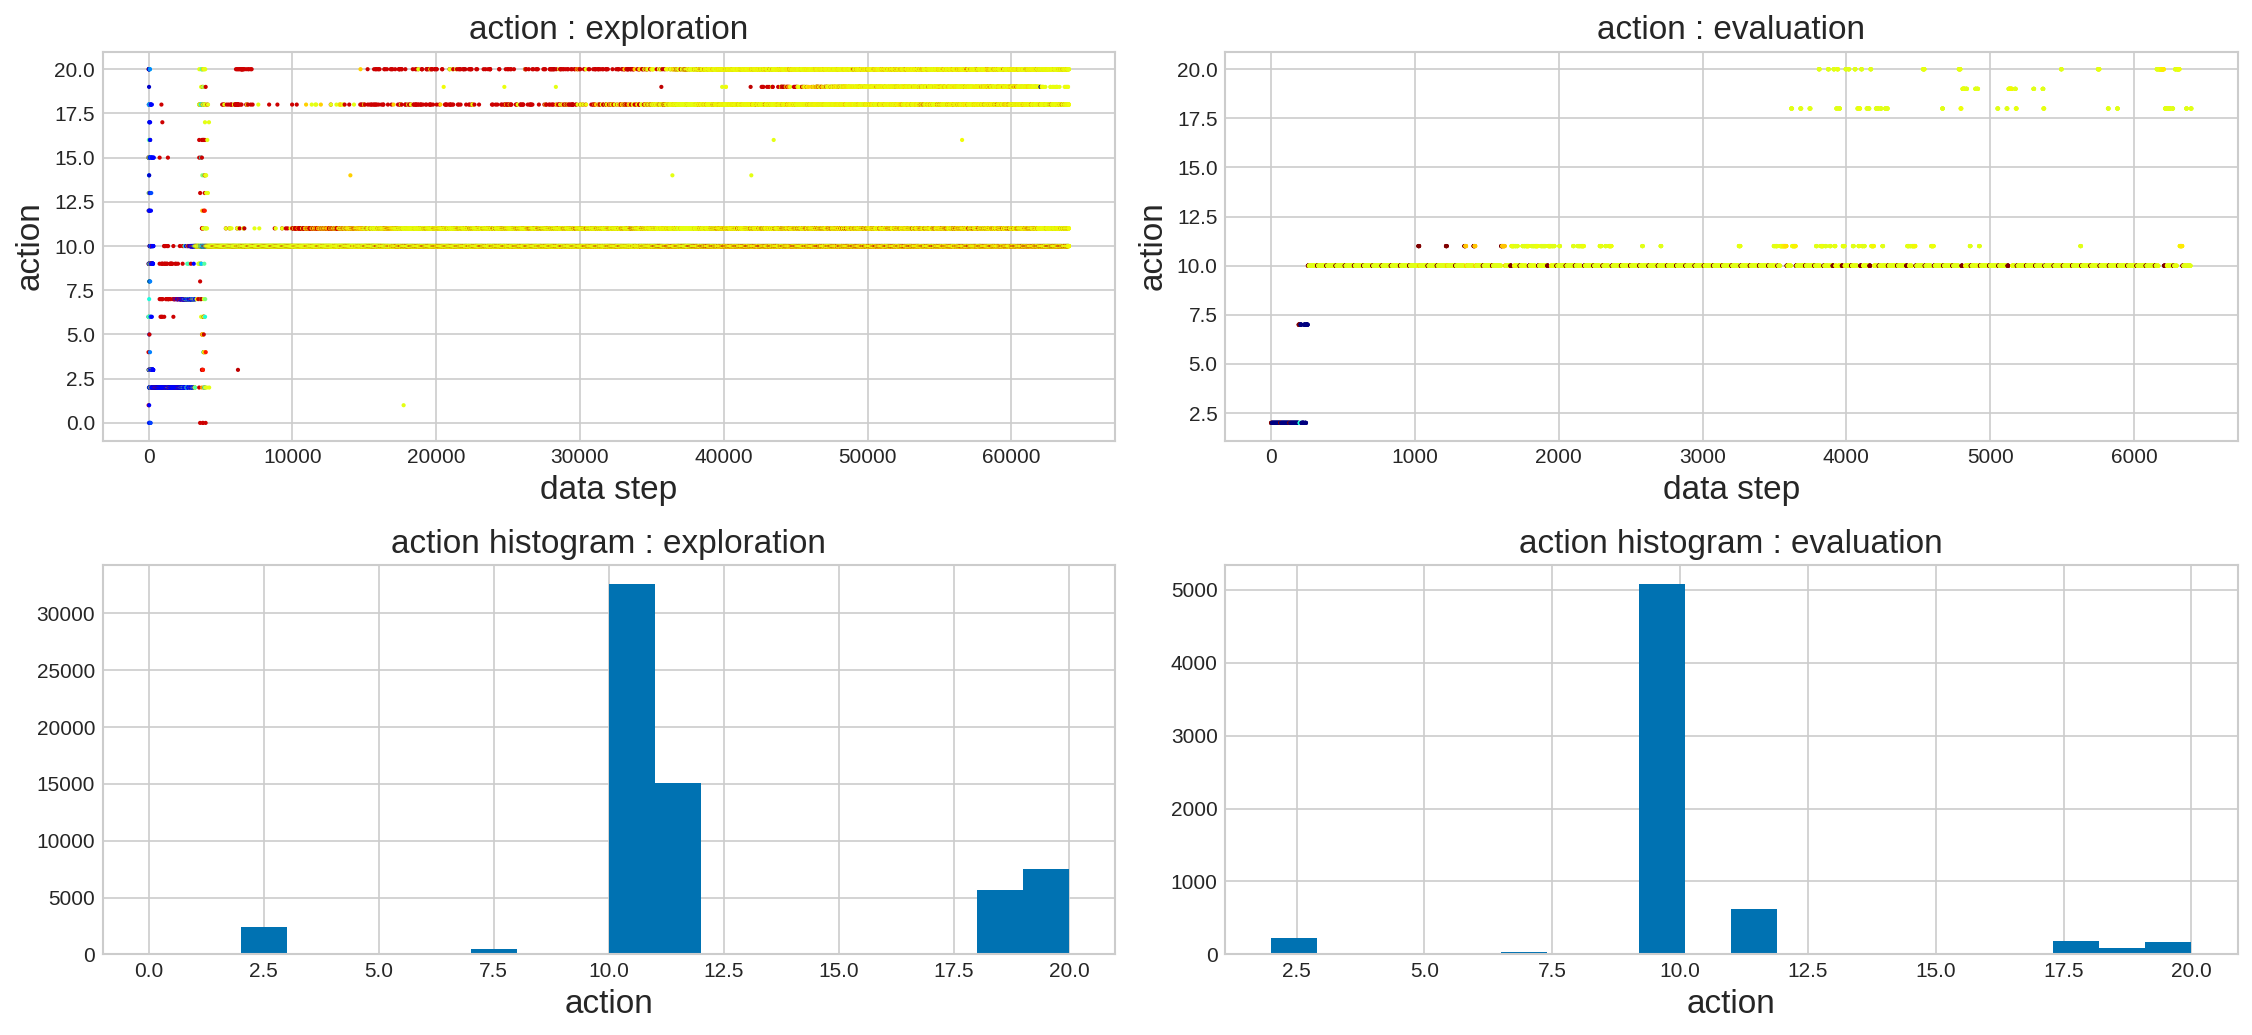

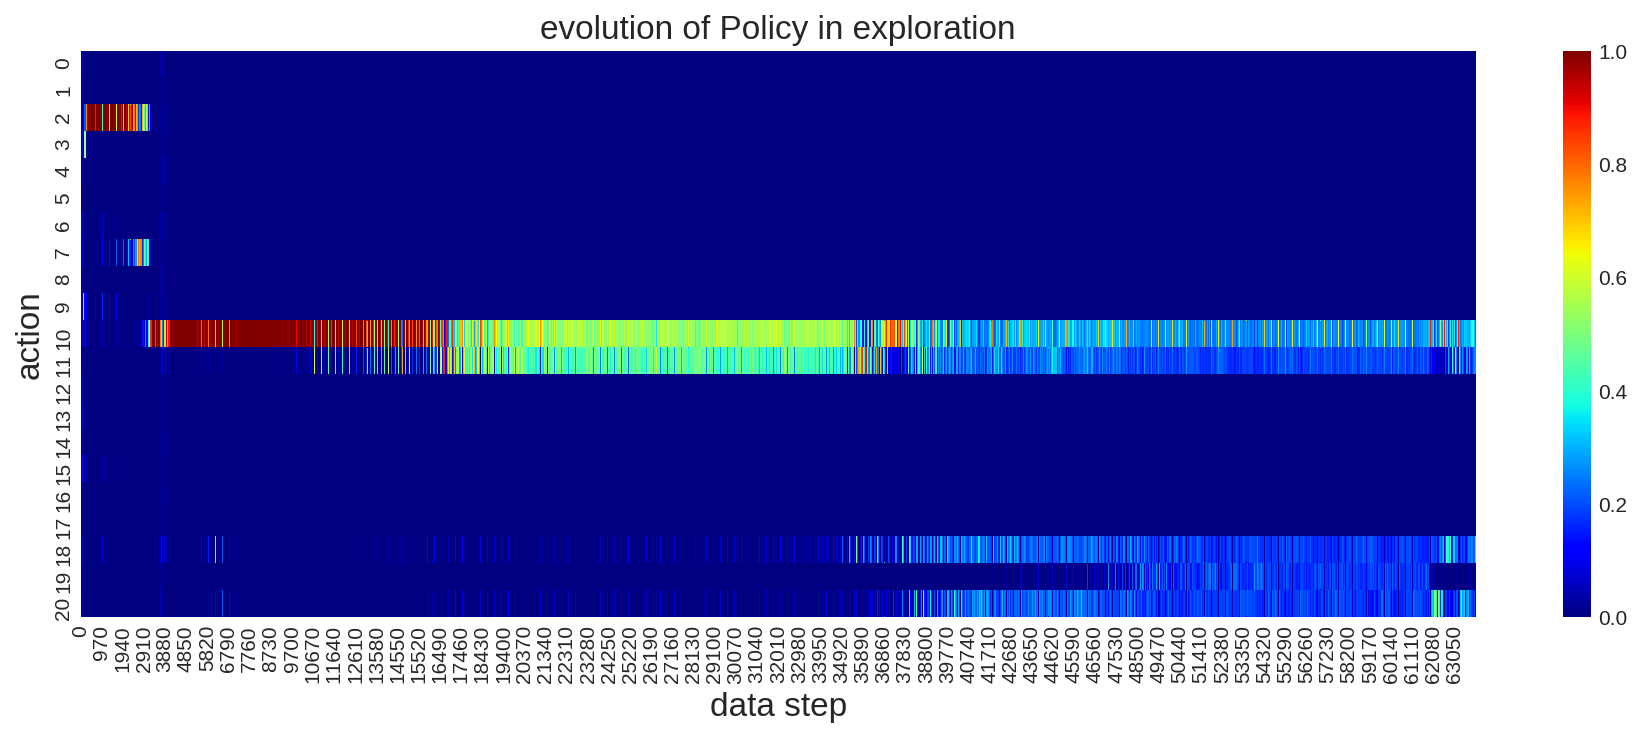

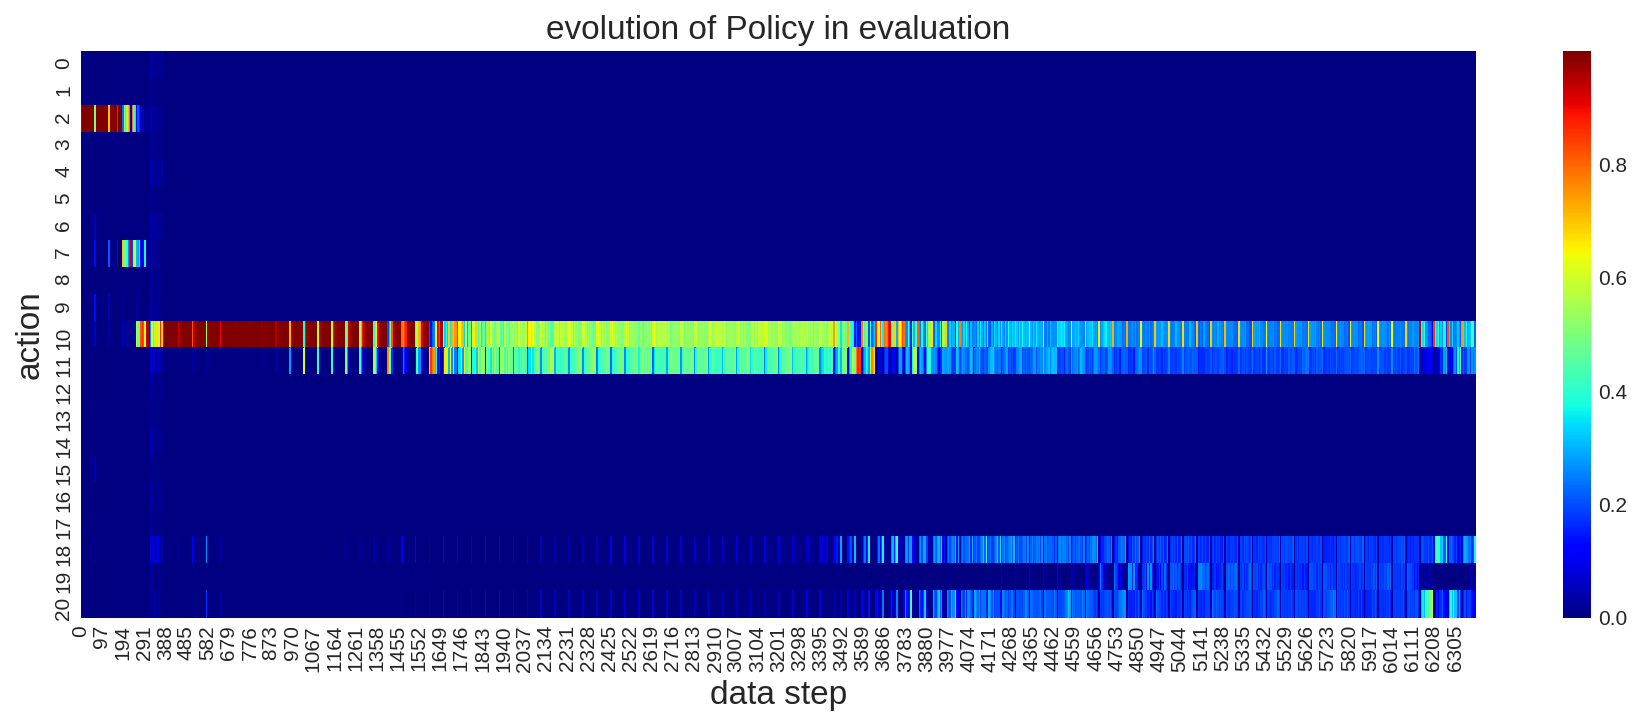

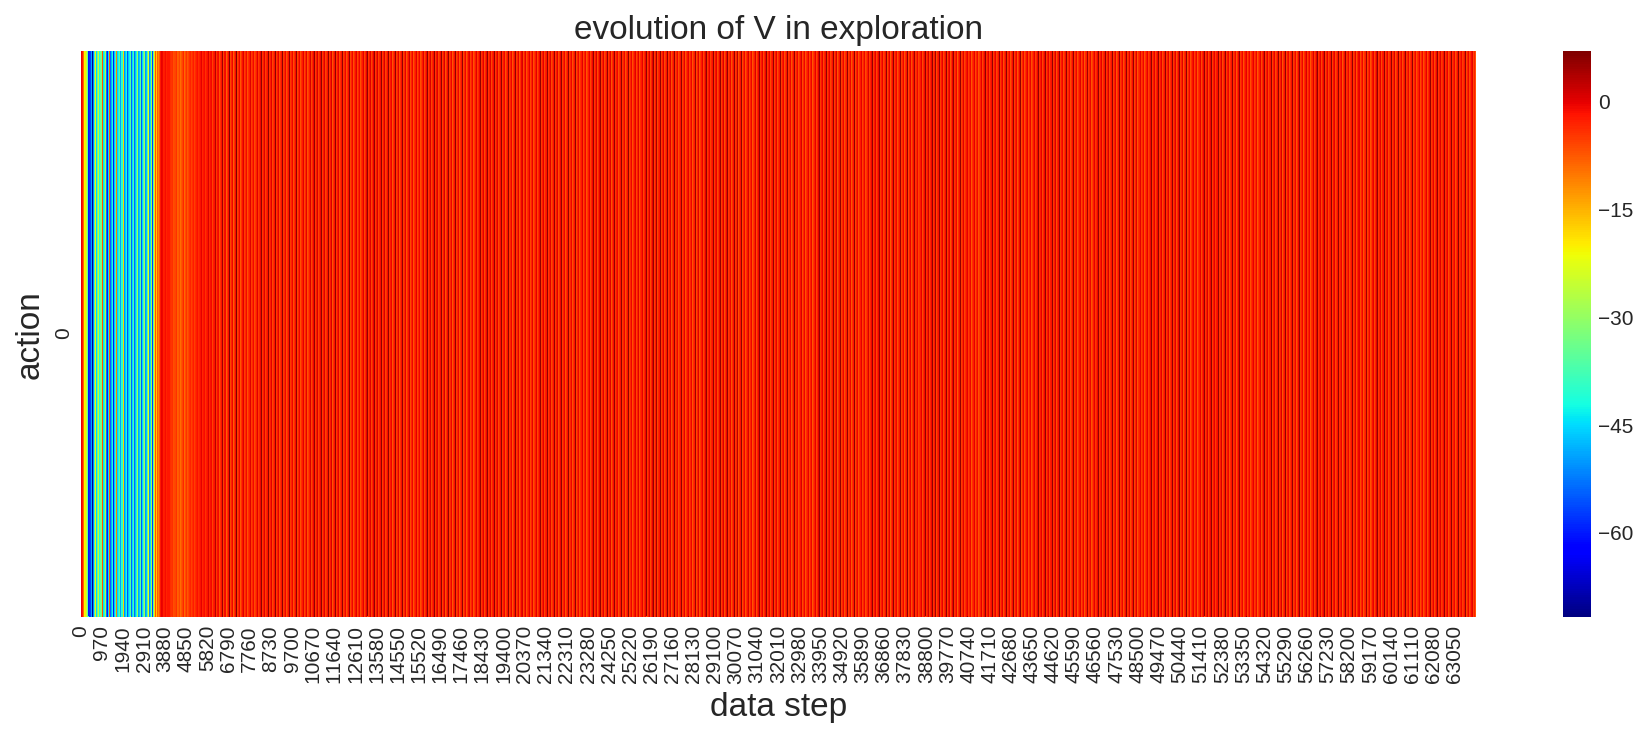

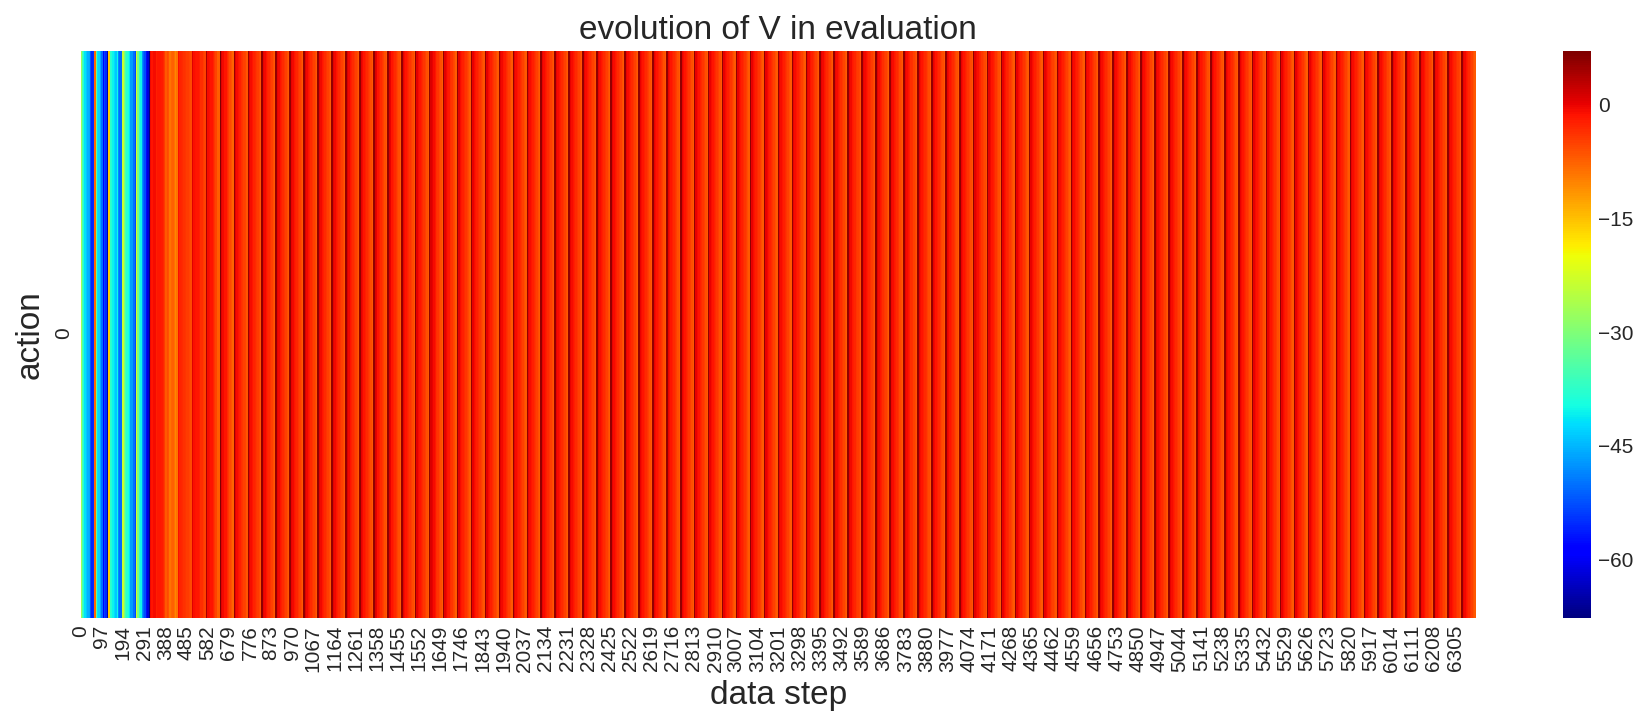

bankrupt=12854, total=352064, ratio=0.0365


In [6]:
import A2C  # original DRL code
importlib.reload(A2C)  # original DRL code
from keras import optimizers

model = A2C.gen_model(input_shapes=env.shapes(), n_outputs=21, 
                      hidden_dims=[128, 64, 32])

#df = pd.DataFrame()
for lr, n_advantages, mult_critic, mult_entropy in itertools.product(
    [1e-2,], [10,], [0.1,], [0.1,]):
    print('======================================================')
    print('lr={}, n_advantages={}, mult_critic={}, mult_entropy={}'
          .format(lr, n_advantages, mult_critic, mult_entropy))
    
    tester = A2C.Tester(env, model)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, n_advantages=n_advantages,
               gamma=1.0/(1+hurdle), optimizer=optimizers.Adam(lr=lr),
               mult_actor=1.0, mult_critic=mult_critic, mult_entropy=mult_entropy,
               verbose=False, verbose_interval=100, evaluate_interval=100, 
               get_log=True)

    viz = A2C.Visualizer()
    viz.viz_action_history(tester.trainer, lambda x:x[0], 
                           cmap='jet', alpha=1.0, s=1.0)
    viz.viz_P_history(tester.trainer)
    viz.viz_V_history(tester.trainer)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #f_temp['n_advantages'] = n_advantages
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'A2C_discrete'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0
    
df.to_csv(tester.name + '.csv')

In [7]:
mu_min = 0.0
mu_max = 20.0

lr=0.001, n_advantages=10, mult_critic=0.1, mult_entropy=0.01
start testing... :  2019-11-07 01:54:56.130281
start 0/5 th trial...


  0%|          | 1/10000 [00:00<1:24:15,  1.98it/s]W1107 01:54:57.700143 140098083907392 deprecation.py:323] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100%|██████████| 10000/10000 [00:31<00:00, 315.50it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [00:32<00:00, 304.39it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [00:34<00:00, 291.63it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [00:35<00:00, 289.55it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [00:36<00:00, 272.22it/s]


end testing... :  2019-11-07 01:57:51.787994
loss and reward history


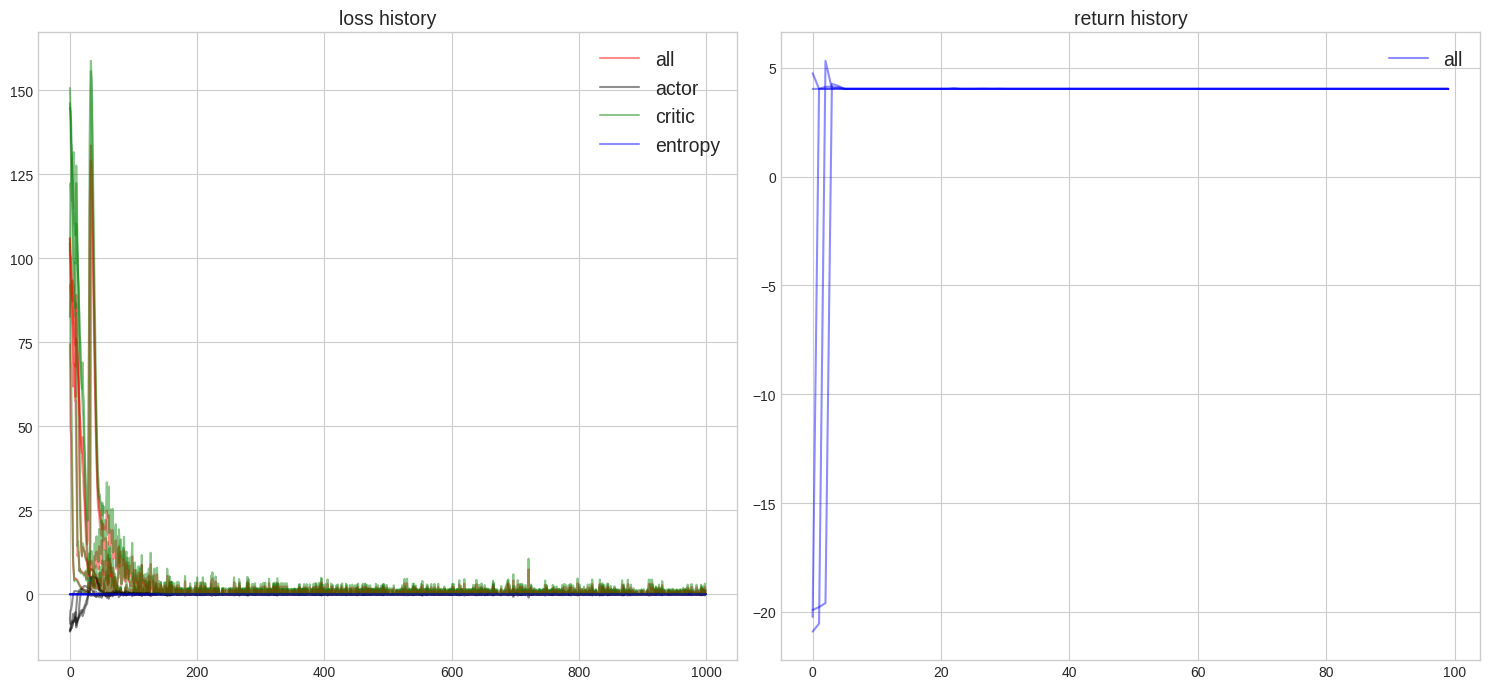

acquired action
action =  [19.981 19.981 19.981 19.981 19.981 19.981 19.981 19.981 19.981 19.981]
action =  [19.951 19.951 19.951 19.951 19.951 19.951 19.951 19.951 19.951 19.951]
action =  [19.936 19.936 19.936 19.936 19.936 19.936 19.936 19.936 19.936 19.936]
action =  [19.984 19.984 19.984 19.984 19.984 19.984 19.984 19.984 19.984 19.984]
action =  [19.993 19.993 19.993 19.993 19.993 19.993 19.993 19.993 19.993 19.993]
action =  [19.993 19.993 19.993 19.993 19.993 19.993 19.993 19.993 19.993 19.993]
action =  [19.996 19.996 19.996 19.996 19.996 19.996 19.996 19.996 19.996 19.996]
action =  [19.994 19.994 19.994 19.994 19.994 19.994 19.994 19.994 19.994 19.994]
action =  [19.991 19.991 19.991 19.991 19.991 19.991 19.991 19.991 19.991 19.991]
action =  [19.996 19.996 19.996 19.996 19.996 19.996 19.996 19.996 19.996 19.996]
return [4.033 4.033 4.033 4.033 4.033 4.033 4.033 4.033 4.033 4.033]
param distribution in model


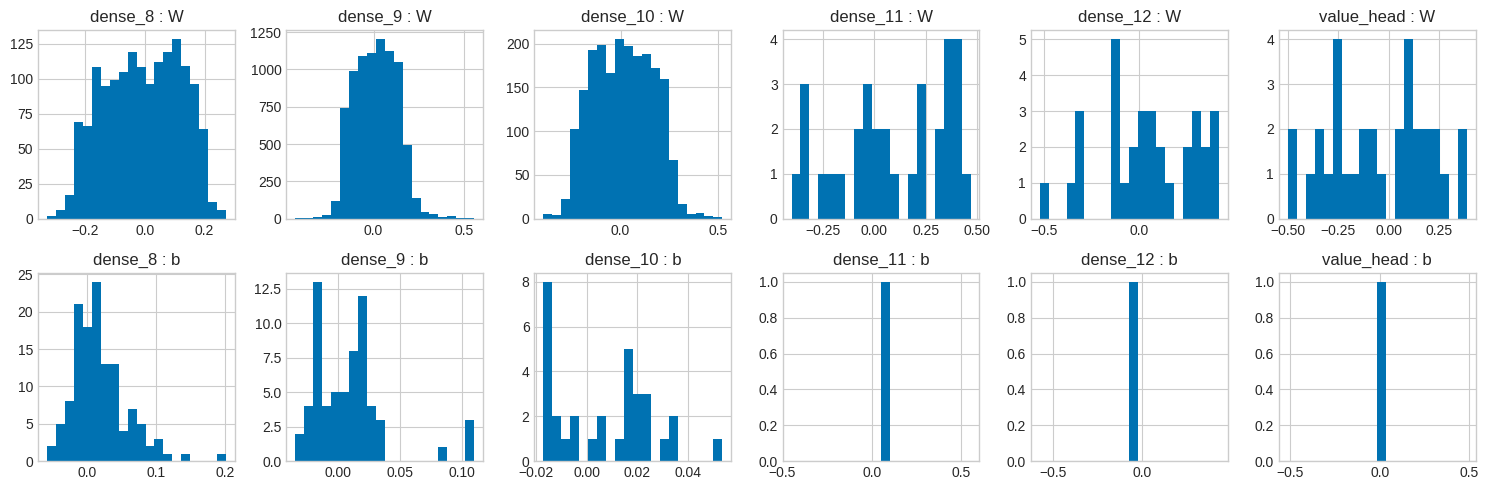

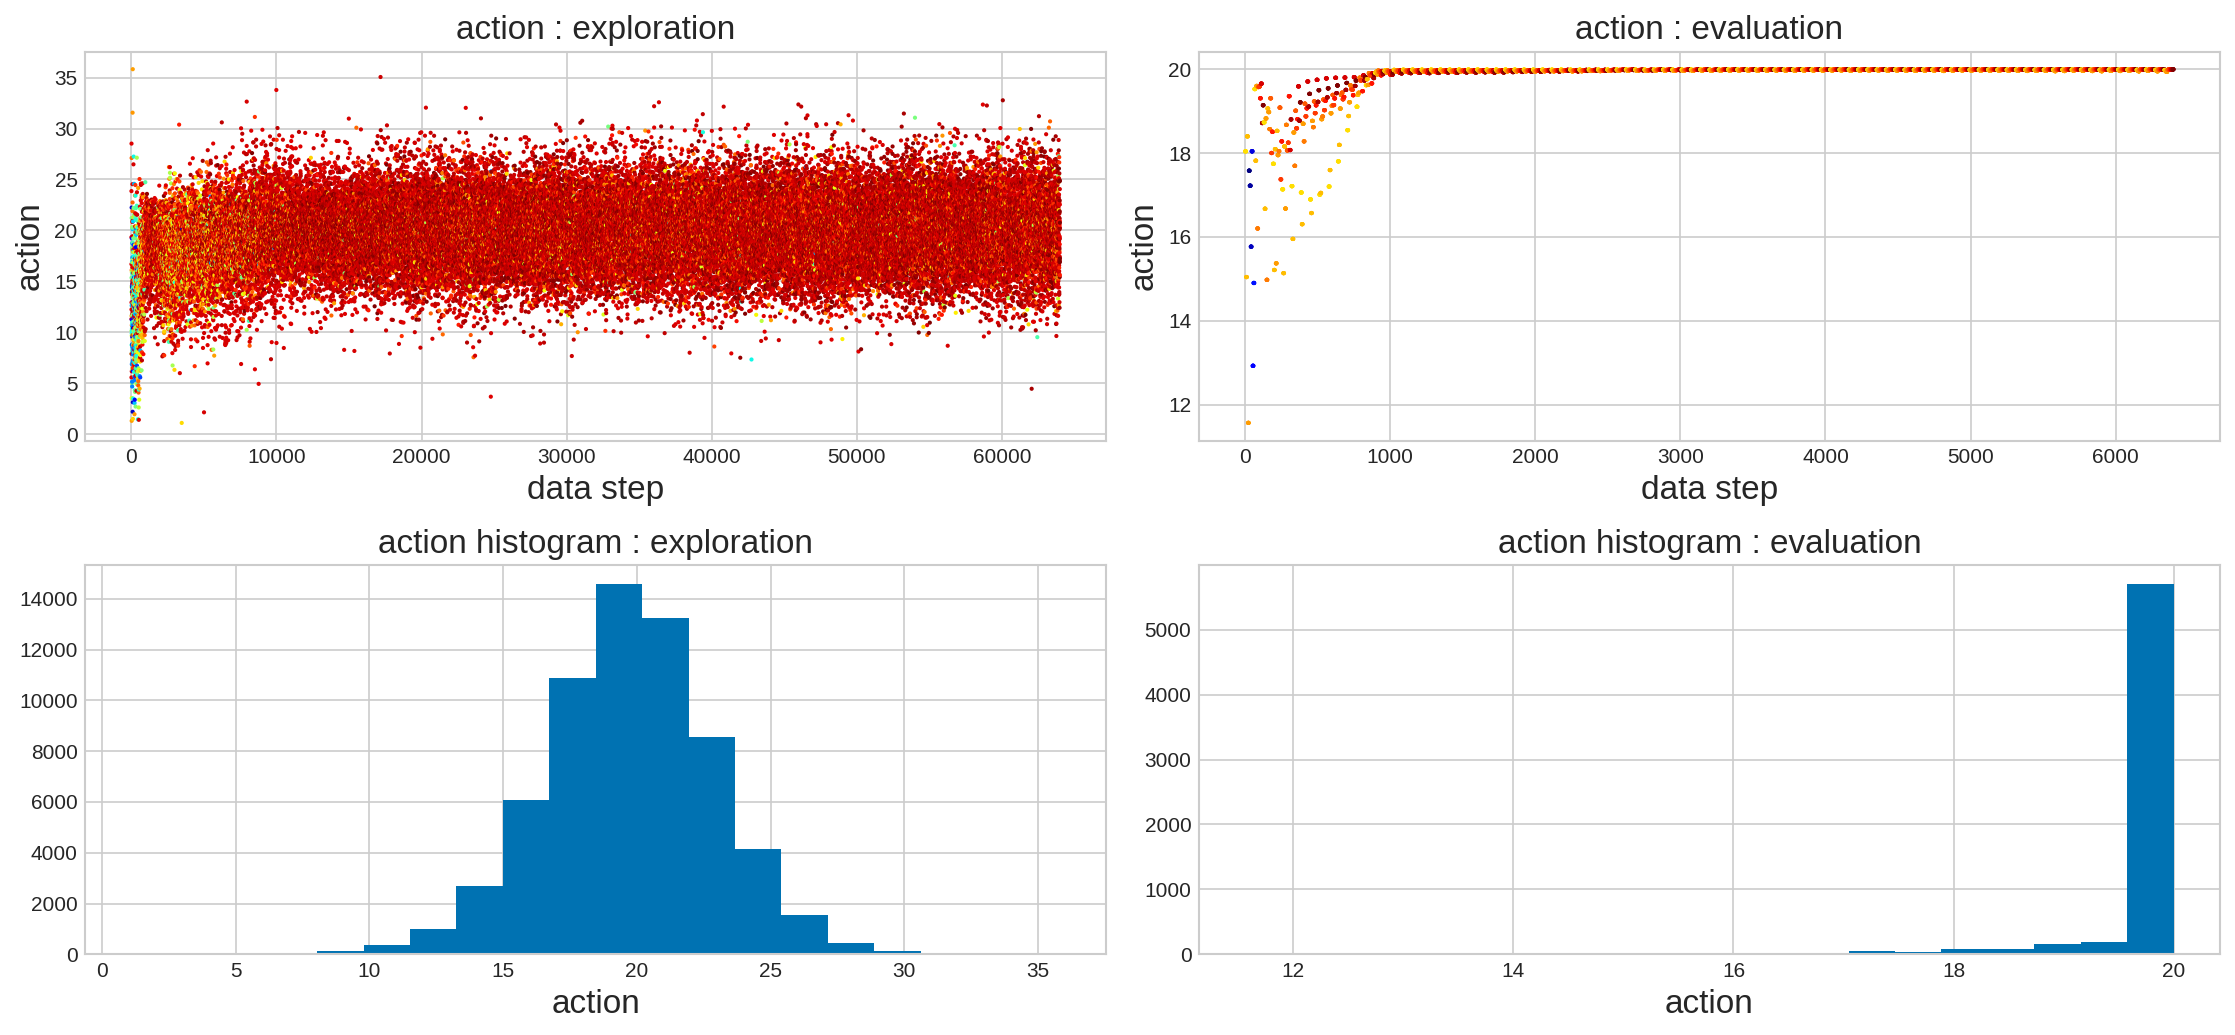

bankrupt=9651, total=352522, ratio=0.0274


In [8]:
import importlib
import A2C_continuous
importlib.reload(A2C_continuous)  # original DRL code

from keras import optimizers

mu_min = mu_min
mu_max = mu_max
sigma_max = (mu_max - mu_min) / 3

model = A2C_continuous.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                                 hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                                mu_min=mu_min, mu_max=mu_max, 
                                va_min=(0.001)**2, va_max=sigma_max**2, 
                                input_reg=False, input_min=0, input_max=1)

#df = pd.DataFrame()
for lr, n_advantages, mult_critic, mult_entropy in itertools.product(
    [1e-3,], [10,], [0.1,], [0.01,]):
    print('======================================================')
    print('lr={}, n_advantages={}, mult_critic={}, mult_entropy={}'
          .format(lr, n_advantages, mult_critic, mult_entropy))
    
    tester = A2C_continuous.Tester(env, model, val_min=mu_min-3*sigma_max, val_max=mu_max+3*sigma_max)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, n_advantages=n_advantages,
               gamma=1.0/(1+hurdle), optimizer=optimizers.Adam(lr=lr),
               mult_actor=0.1, mult_critic=mult_critic, mult_entropy=mult_entropy,
               verbose=False, verbose_interval=100, evaluate_interval=100, 
               get_log=True)

    viz = A2C_continuous.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['n_advantages'] = n_advantages
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'A2C_continuous'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr_p=0.0001, lr_v=0.001, boltzmann=False, sigma_end=1.0, tau_end=10
start testing... :  2019-11-07 01:57:57.393824
start 0/5 th trial...


100%|██████████| 10000/10000 [04:20<00:00, 26.59it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [04:22<00:00, 25.62it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [04:31<00:00, 36.81it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [04:38<00:00, 25.87it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [04:47<00:00, 34.79it/s]


end testing... :  2019-11-07 02:20:59.111456
loss and reward history


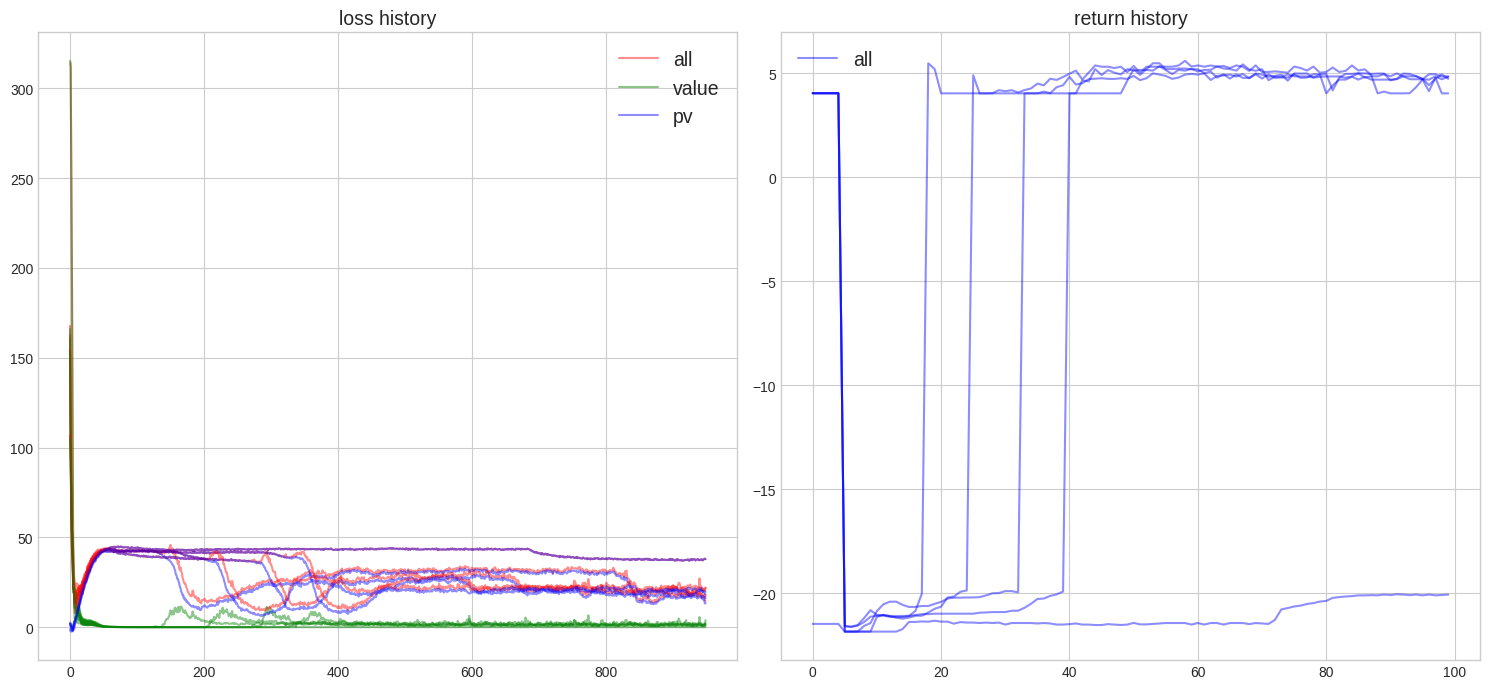

acquired action
action =  [19.975 19.975 19.975 19.975 19.975 19.975 19.975 19.975 19.975 19.975]
action =  [19.97 19.97 19.97 19.97 19.97 19.97 19.97 19.97 19.97 19.97]
action =  [16.349 16.349 16.349 16.349 16.349 16.349 16.349 16.349 16.349 16.349]
action =  [15.623 15.623 15.623 15.623 15.623 15.623 15.623 15.623 15.623 15.623]
action =  [15.542 15.542 15.542 15.542 15.542 15.542 15.542 15.542 15.542 15.542]
action =  [15.475 15.475 15.475 15.475 15.475 15.475 15.475 15.475 15.475 15.475]
action =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
action =  [3.576e-06 3.576e-06 3.576e-06 3.576e-06 3.576e-06 3.576e-06 3.576e-06
 3.576e-06 3.576e-06 3.576e-06]
action =  [5.066e-05 5.066e-05 5.066e-05 5.066e-05 5.066e-05 5.066e-05 5.066e-05
 5.066e-05 5.066e-05 5.066e-05]
action =  [7.57e-05 7.57e-05 7.57e-05 7.57e-05 7.57e-05 7.57e-05 7.57e-05 7.57e-05
 7.57e-05 7.57e-05]
return [-20.055 -20.055 -20.055 -20.055 -20.055 -20.055 -20.055 -20.055 -20.055
 -20.055]
param distribution in model_policy


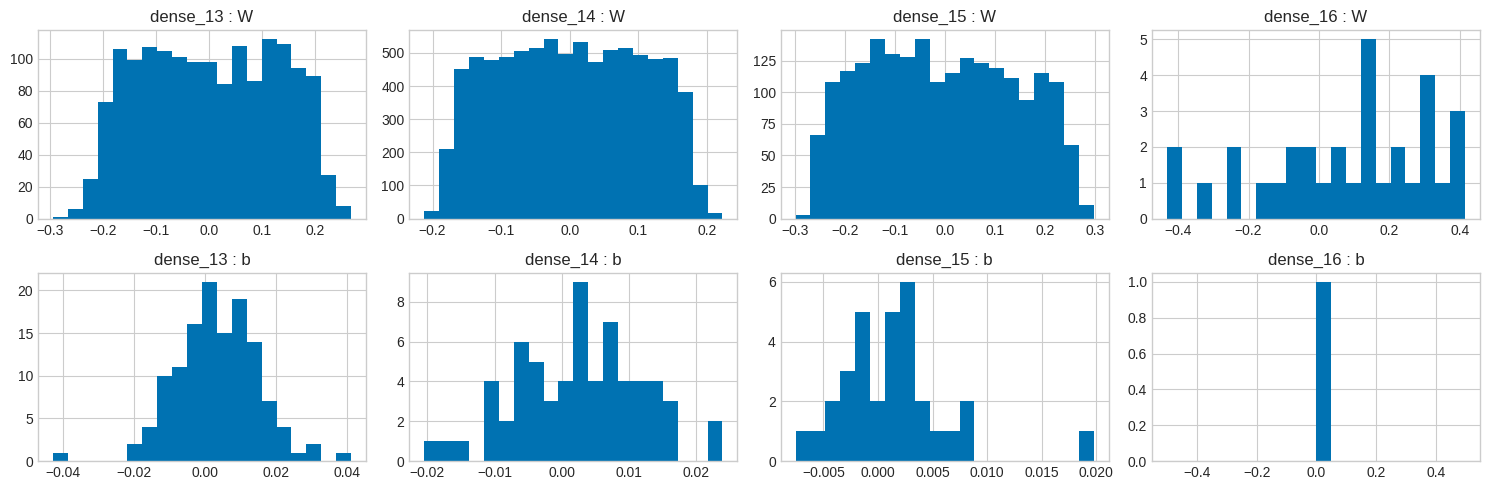

param distribution in model_value


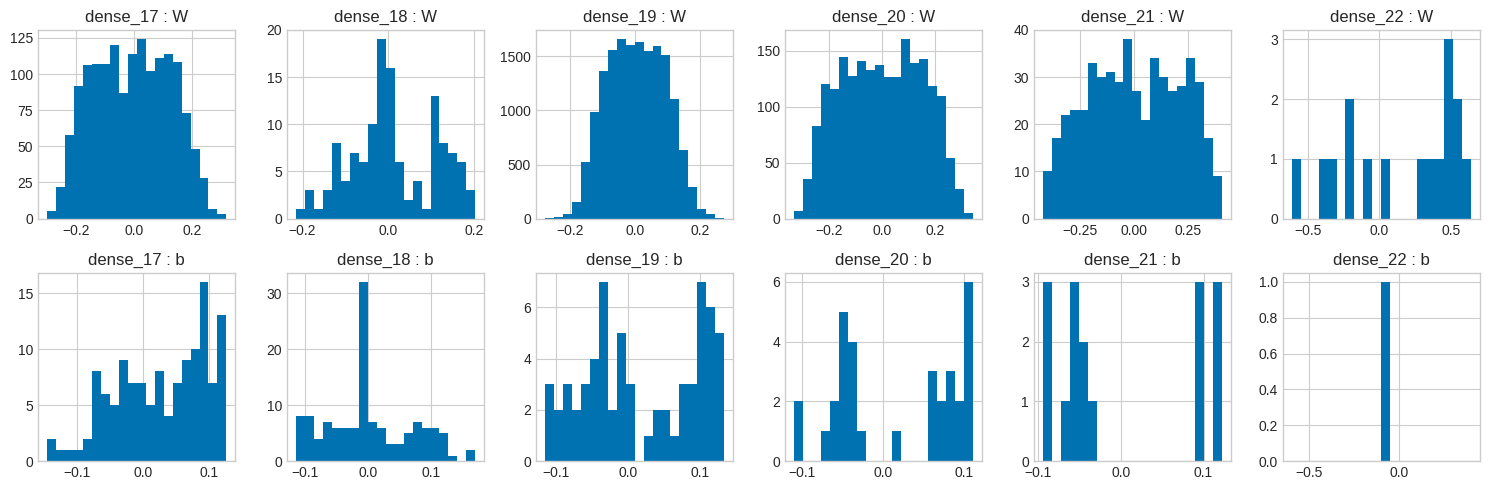

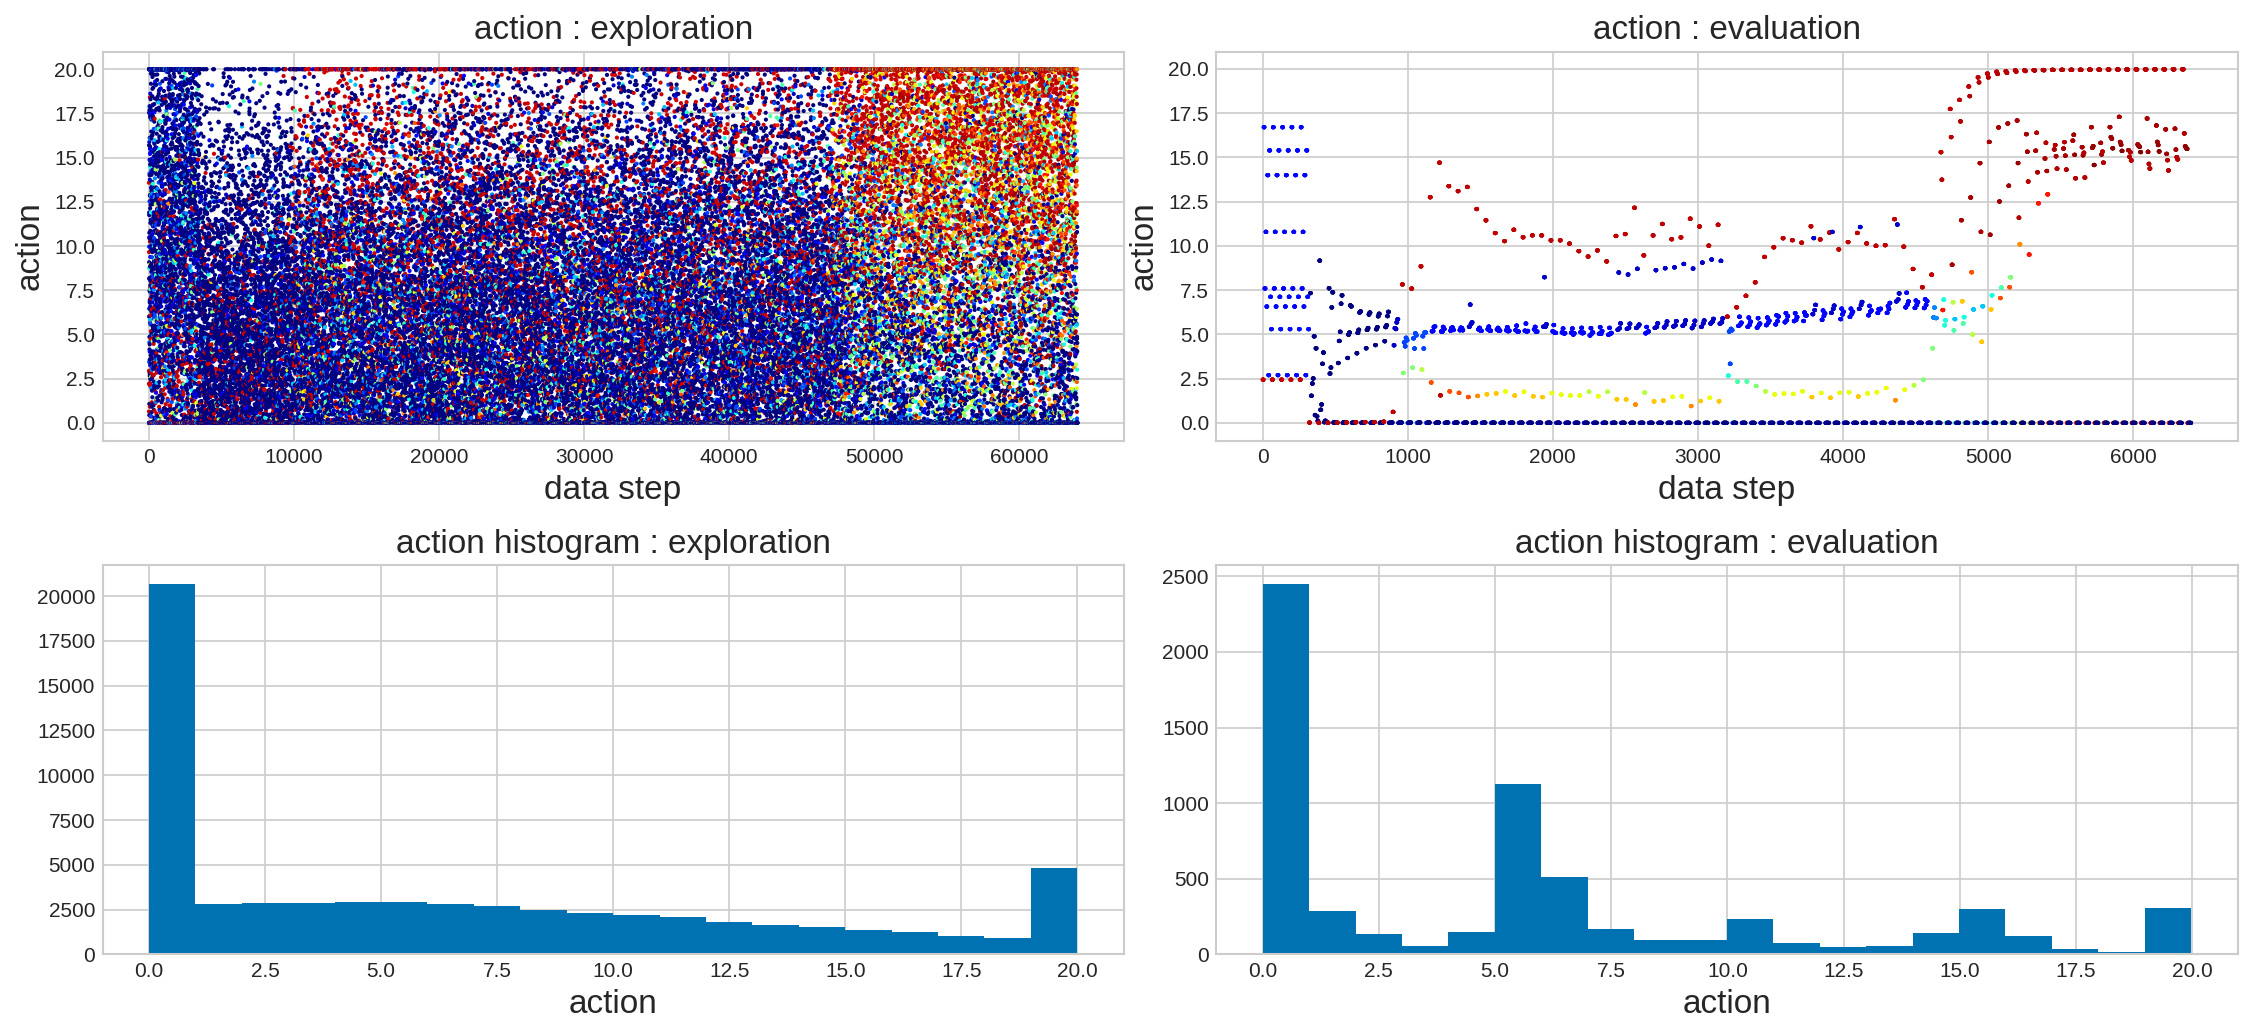

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


bankrupt=301189, total=352064, ratio=0.8555


In [9]:
import DDPG  # original DRL code
importlib.reload(DDPG)
from keras import optimizers

action_min = mu_min
action_max = mu_max
sigma_max = (action_max - action_min) / 3

model_policy = DDPG.gen_model_policy(state_shapes=env.shapes(), n_actions=1, 
                                     hidden_dims=[128, 64, 32], 
                                     reg_l1=0.0, reg_l2=0.0, 
                                     action_min=action_min, action_max=action_max, 
                                     batch_norm_input=False, 
                                     state_reg=False, state_min=0, state_max=10)

model_value = DDPG.gen_model_value(state_shapes=env.shapes(), n_actions=1, \
                                   hidden_action_dims=[128,], 
                                   hidden_state_dims=[128,],
                                   hidden_dims=[64, 32, 16],
                                   reg_l1=0.0, reg_l2=0.0,
                                   batch_norm_state_hidden=False)


#df = pd.DataFrame()
for lr_p, lr_v, boltzmann, sigma_end, tau_end in itertools.product(
    [1e-4,], [1e-3,], [False,], [1.0,], [10,]):
    print('======================================================')
    print('lr_p={}, lr_v={}, boltzmann={}, sigma_end={}, tau_end={}'
          .format(lr_p, lr_v, boltzmann, sigma_end, tau_end))
    
    tester = DDPG.Tester(env, model_policy, model_value, val_min=action_min, val_max=action_max)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials,
                gamma=1.0/(1+hurdle),
                n_steps=n_steps, training_interval=10, n_batches=10, batch_size=256,
                target_update_interval_policy=20, target_update_interval_value=20,
                tau_policy=0.5, tau_value=0.5,
                optimizer_pv=optimizers.Adam(lr=lr_p), optimizer_value=optimizers.Adam(lr=lr_v),
                sigma_start=sigma_max, sigma_end=sigma_max*sigma_end, sigma_interval=n_steps,
                boltzmann=boltzmann, tau_start=10, tau_end=tau_end, tau_interval=n_steps, n_samples=64,
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                wampup_steps=500, 
                get_log=True)

    viz = DDPG.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                               cmap='jet', alpha=1.0, s=1.0)
    viz.viz_Q_history(trainer=tester.trainer, 
                      state_valuation=lambda x:np.ravel(x[0][:, 0]), 
                      action_valuation=lambda x:np.ravel(x[:, 0]),
                      data_span_exp=100, data_span_eva=100,)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr_p'] = lr_p
        #df_temp['lr_v'] = lr_v
        #df_temp['boltzmann'] = boltzmann
        #df_temp['sigma_end'] = sigma_end
        #df_temp['tau_end'] = tau_end
        df_temp['Agent'] = 'DDPG'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr=0.0001, sigma_end=0.5
start testing... :  2019-11-07 02:21:14.845843
start trial 0/5 trial...


100%|██████████| 10000/10000 [00:47<00:00, 209.97it/s]


start trial 1/5 trial...


100%|██████████| 10000/10000 [00:48<00:00, 218.88it/s]


start trial 2/5 trial...


100%|██████████| 10000/10000 [00:50<00:00, 199.97it/s]


start trial 3/5 trial...


100%|██████████| 10000/10000 [00:51<00:00, 194.34it/s]


start trial 4/5 trial...


100%|██████████| 10000/10000 [00:52<00:00, 189.22it/s]


end testing... :  2019-11-07 02:25:35.799101
loss and return history


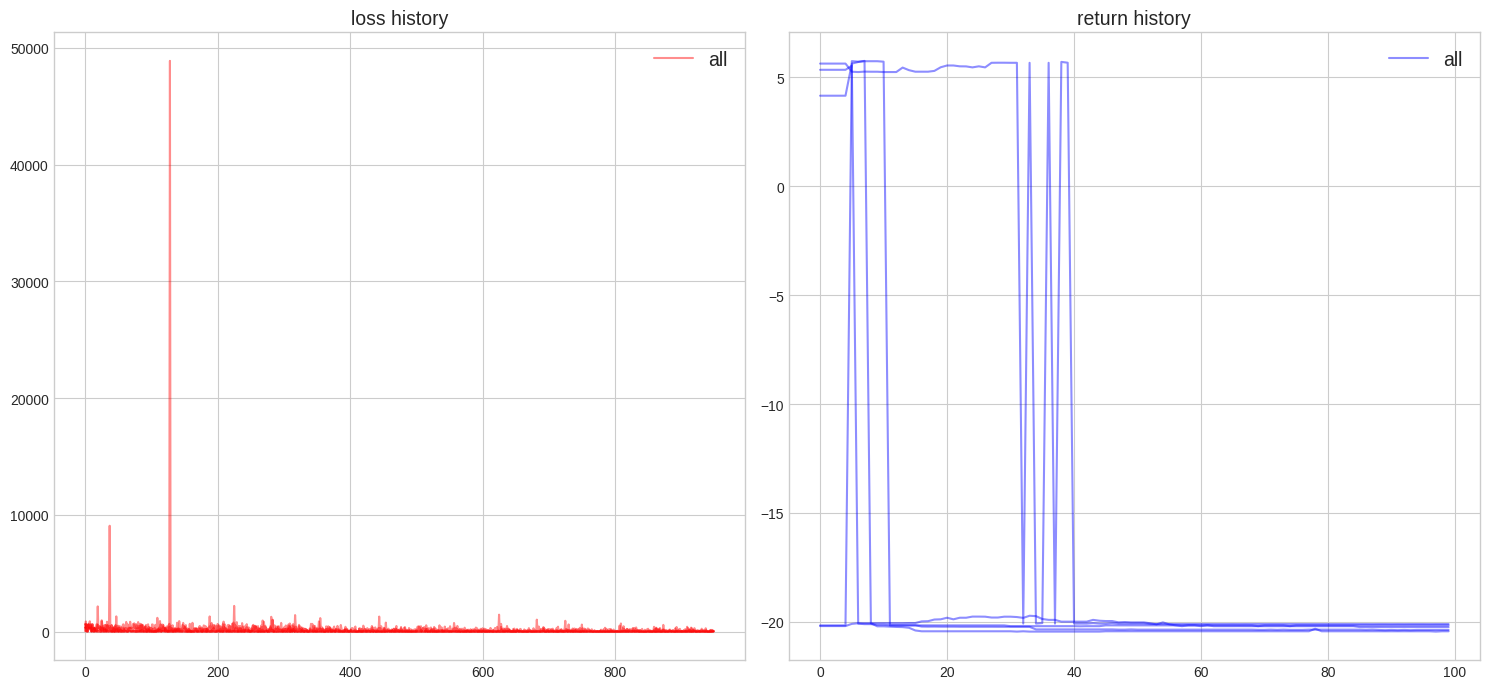

acquired action
action =  [9.232 9.232 9.232 9.232 9.232 9.232 9.232 9.232 9.232 9.232]
action =  [9.718 9.718 9.718 9.718 9.718 9.718 9.718 9.718 9.718 9.718]
action =  [8.919 8.919 8.919 8.919 8.919 8.919 8.919 8.919 8.919 8.919]
action =  [9.359 9.359 9.359 9.359 9.359 9.359 9.359 9.359 9.359 9.359]
action =  [8.903 8.903 8.903 8.903 8.903 8.903 8.903 8.903 8.903 8.903]
action =  [9.035 9.035 9.035 9.035 9.035 9.035 9.035 9.035 9.035 9.035]
action =  [9.162 9.162 9.162 9.162 9.162 9.162 9.162 9.162 9.162 9.162]
action =  [8.777 8.777 8.777 8.777 8.777 8.777 8.777 8.777 8.777 8.777]
action =  [8.655 8.655 8.655 8.655 8.655 8.655 8.655 8.655 8.655 8.655]
action =  [7.642 7.642 7.642 7.642 7.642 7.642 7.642 7.642 7.642 7.642]
return [-20.249 -20.249 -20.249 -20.249 -20.249 -20.249 -20.249 -20.249 -20.249
 -20.249]
param distribution in model


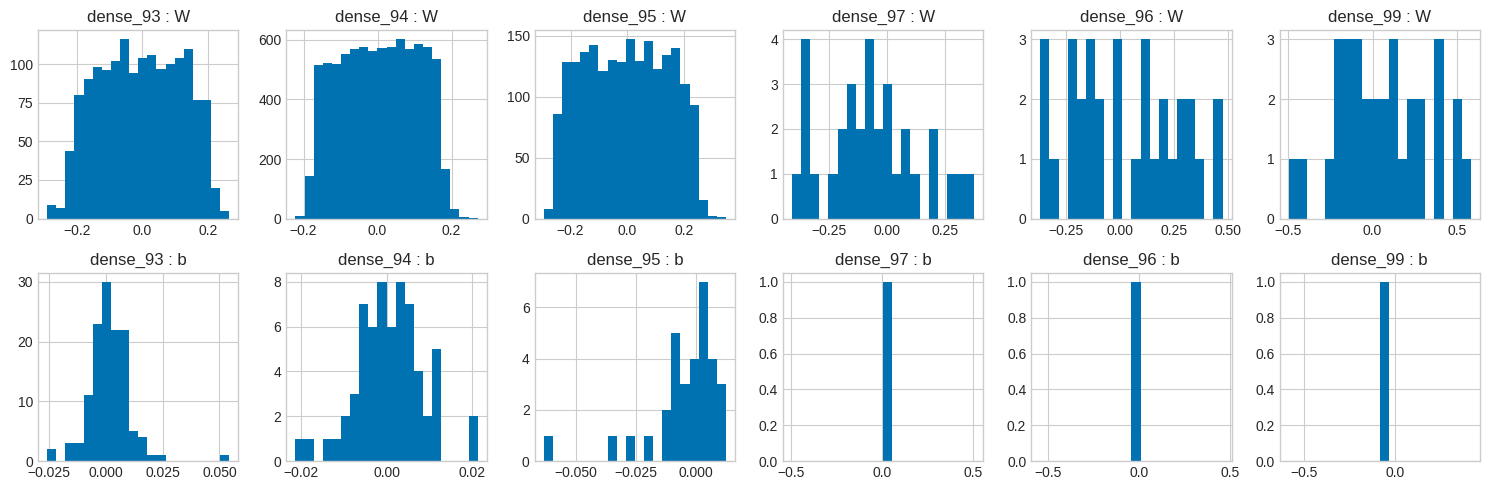

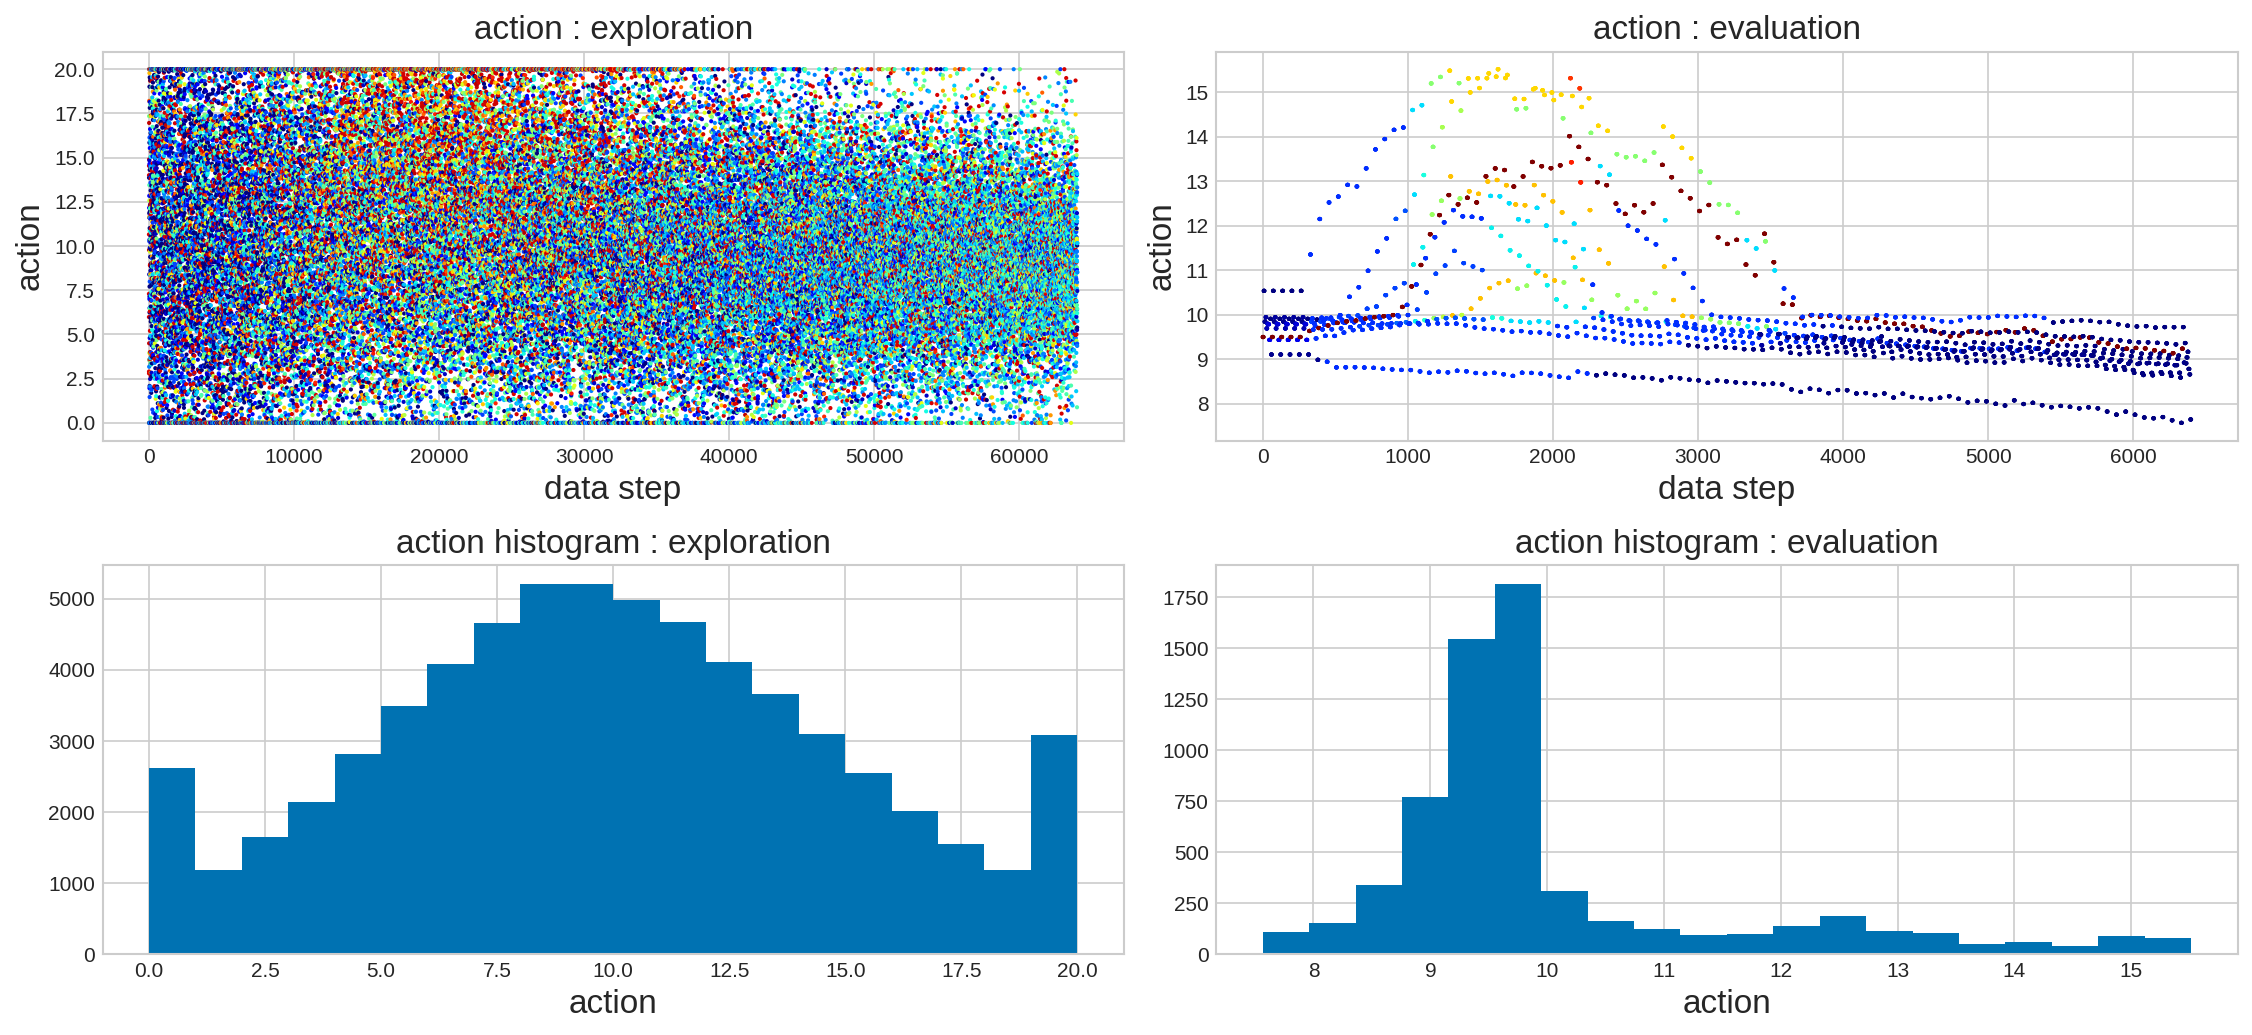

bankrupt=346382, total=352064, ratio=0.9839


In [10]:
import NAF
importlib.reload(NAF)

from keras import optimizers
np.set_printoptions(precision=3)  # 数値桁数を指定．

action_min = mu_min
action_max = mu_max
sigma = (action_max - action_min) / 3

model_gen_func = lambda : NAF.gen_model(input_shapes=env.shapes(), n_actions=1, 
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, 
                     input_reg=False, input_min=0, input_max=10, 
                     action_reg=True, action_min=action_min, action_max=action_max,
                     value_reg=False, value_min=0, value_max=10)
model = model_gen_func()

#df = pd.DataFrame()
for lr, sigma_end in itertools.product(
    [1e-4,], [0.5,]):
    print('======================================================')
    print('lr={}, sigma_end={}'
          .format(lr, sigma_end))
    
    tester = NAF.Tester(env, model, val_min=action_min, val_max=action_max, 
                        model_gen_func=model_gen_func)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, 
                n_steps=n_steps, training_interval=10, n_batches=10, batch_size=128,
                alpha=1.0, target_update_interval=20,
                gamma=1.0/(1+hurdle),
                optimizer=optimizers.Adam(lr), 
                sigma_start=sigma, sigma_end=sigma * sigma_end, sigma_interval=n_steps,
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)
    
    viz = NAF.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['sigma_end'] = sigma_end
        df_temp['Agent'] = 'NAF'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr=0.0001, mult_critic=1.0, mult_entropy=1e-05
start testing... :  2019-11-07 02:25:40.426253
start 0/5 th trial...


100%|██████████| 10000/10000 [01:33<00:00, 106.67it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [01:35<00:00, 111.29it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [01:34<00:00, 105.78it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [01:34<00:00, 105.73it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [01:36<00:00, 103.18it/s]


end testing... :  2019-11-07 02:33:47.461515
loss and reward history


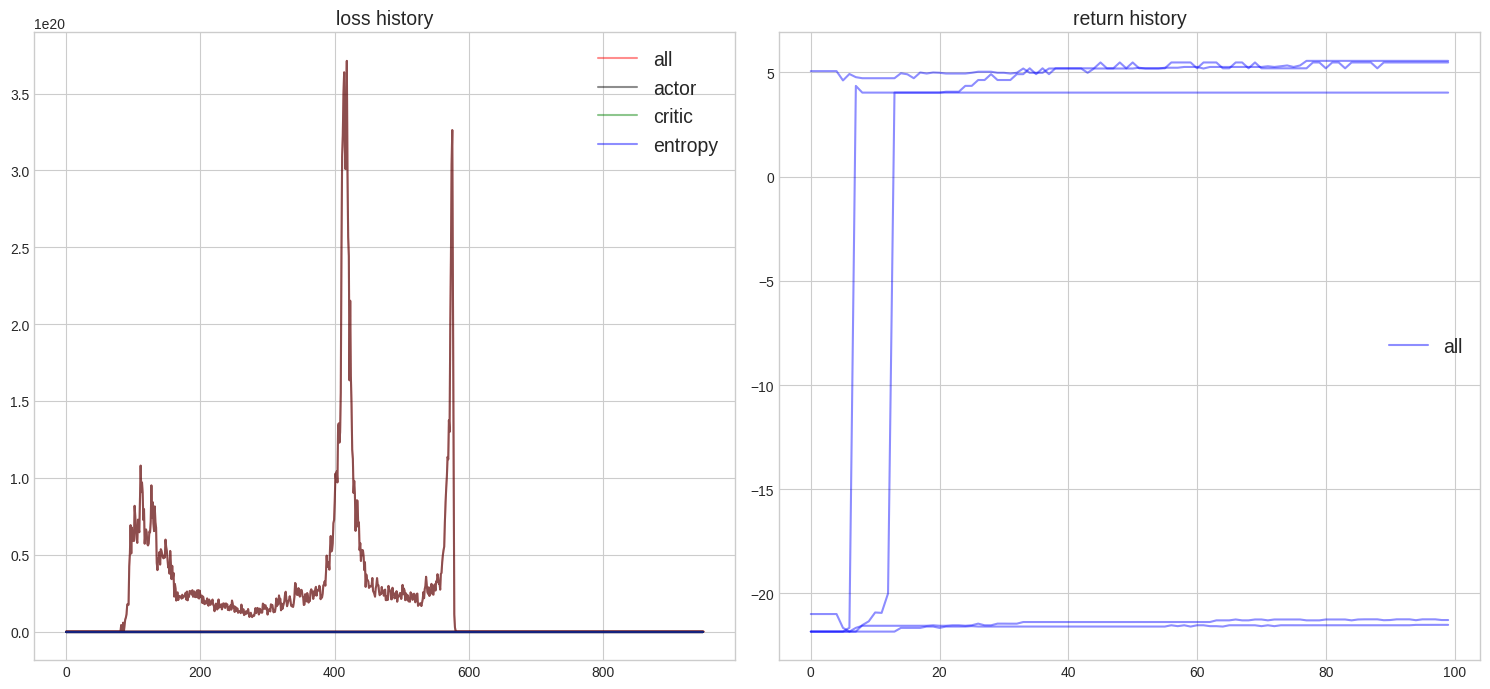

acquired action
action =  [3.492 3.492 3.492 3.492 3.492 3.492 3.492 3.492 3.492 3.492]
action =  [3.995 3.995 3.995 3.995 3.995 3.995 3.995 3.995 3.995 3.995]
action =  [3.593 3.593 3.593 3.593 3.593 3.593 3.593 3.593 3.593 3.593]
action =  [8.409 8.409 8.409 8.409 8.409 8.409 8.409 8.409 8.409 8.409]
action =  [4.426 4.426 4.426 4.426 4.426 4.426 4.426 4.426 4.426 4.426]
action =  [3.776 3.776 3.776 3.776 3.776 3.776 3.776 3.776 3.776 3.776]
action =  [9.047 9.047 9.047 9.047 9.047 9.047 9.047 9.047 9.047 9.047]
action =  [5.084 5.084 5.084 5.084 5.084 5.084 5.084 5.084 5.084 5.084]
action =  [5.282 5.282 5.282 5.282 5.282 5.282 5.282 5.282 5.282 5.282]
action =  [5.111 5.111 5.111 5.111 5.111 5.111 5.111 5.111 5.111 5.111]
return [-21.28 -21.28 -21.28 -21.28 -21.28 -21.28 -21.28 -21.28 -21.28 -21.28]
param distribution in model


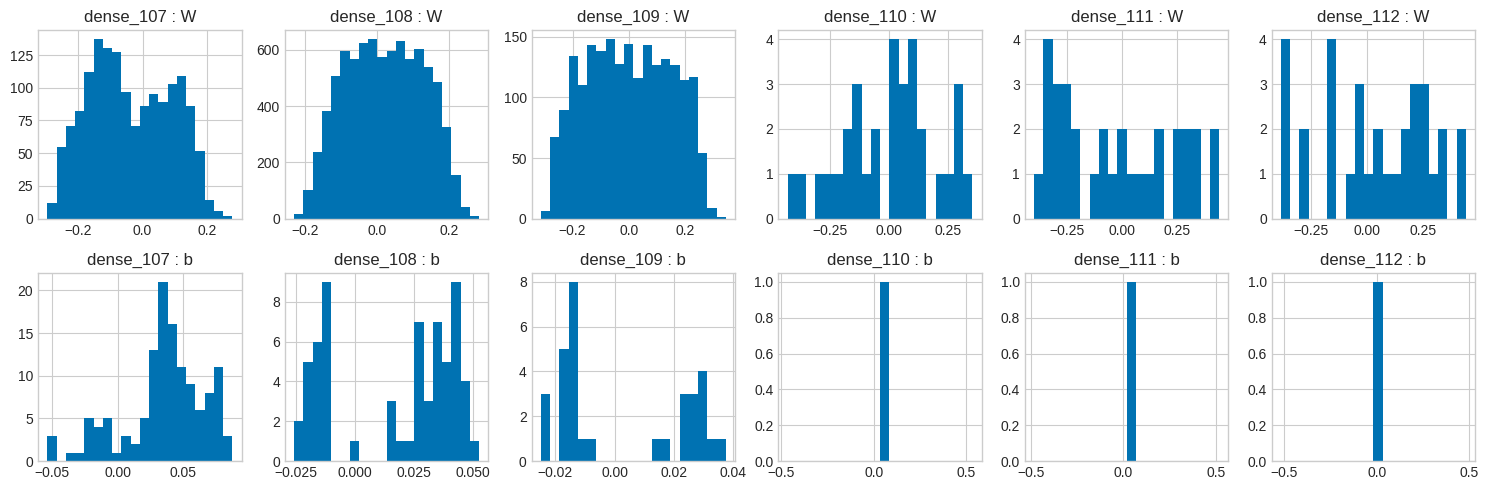

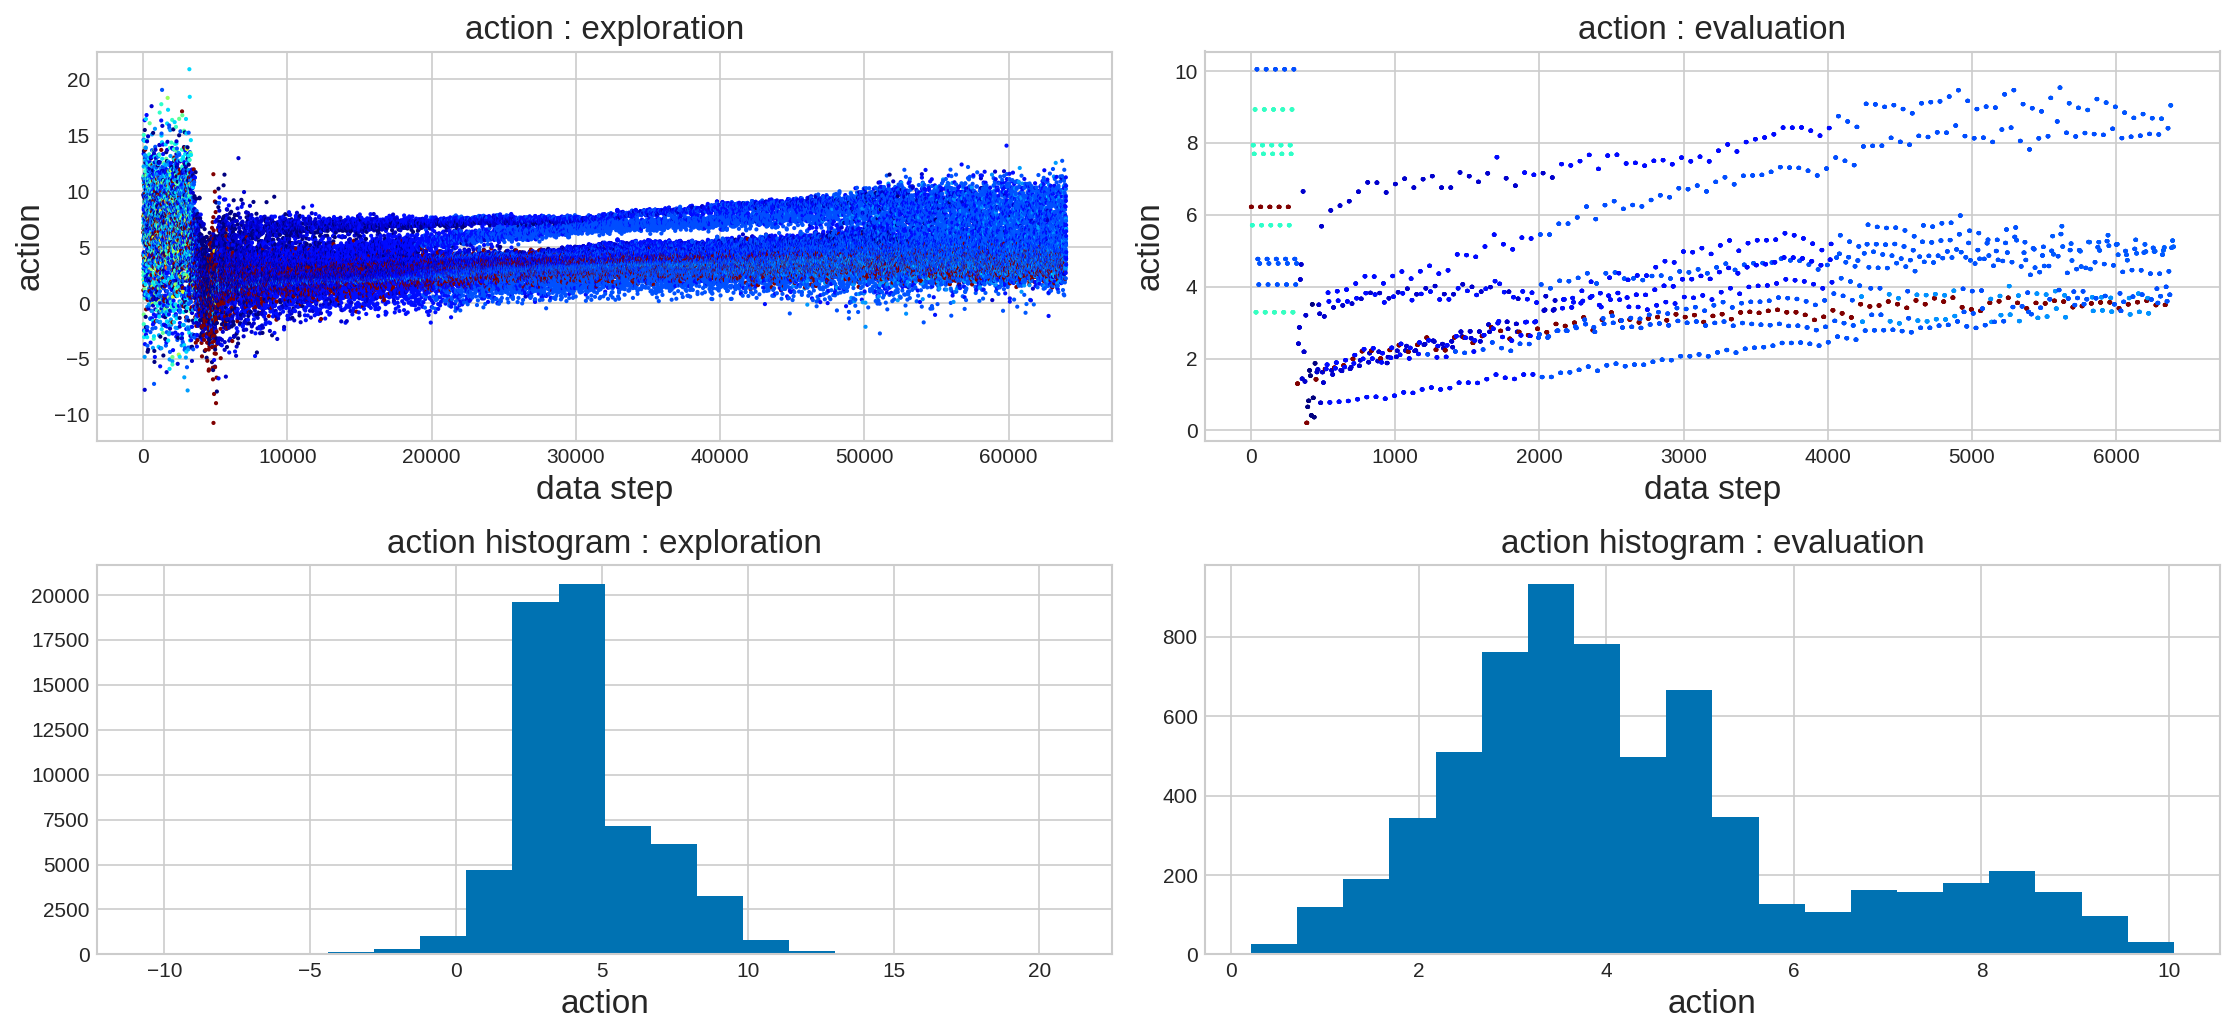

bankrupt=241508, total=398384, ratio=0.6062


In [11]:
import AWR
importlib.reload(AWR)  # original DRL code

from keras import optimizers

mu_min = mu_min
mu_max = mu_max
sigma_max = (mu_max - mu_min) / 3

model = AWR.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                      hidden_dims=[128, 64, 32], reg_l1=1e-6, reg_l2=1e-6, \
                      state_reg=False, state_min=-1.0, state_max=1.0,
                      action_reg=True, 
                      action_min=mu_min, action_max=mu_max, 
                      action_sigma_min=0.0001, action_sigma_max=sigma_max, 
                      value_reg=False, value_min=0, value_max=1)

#df = pd.DataFrame()
for lr, mult_critic, mult_entropy in itertools.product(
    [1e-4,], [1.0,], [1e-5,]):
    print('======================================================')
    print('lr={}, mult_critic={}, mult_entropy={}'
          .format(lr, mult_critic, mult_entropy))
    
    tester = AWR.Tester(env, model, 
                        action_min=mu_min-3*sigma_max, 
                        action_max=mu_max+3*sigma_max)
    #n_trials = 1
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, 
                training_interval=10, n_batches=10, batch_size=256,
                buf_alpha=0.5, buf_beta=0.5, buf_mode='rank',
                gamma=1.0/(1+hurdle), 
                optimizer=optimizers.Adam(lr=lr, clipnorm=10, clipvalue=10),
                mult_actor=1.0, mult_critic=mult_critic, mult_entropy=mult_entropy, mult_beta=1.0, 
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)

    viz = AWR.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'AWR'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

In [12]:
env = Env_Reserve_RB.Environment(cashflow=cashflow, 
                              interest=interest, hurdle=hurdle, 
                              initial_cash=initial_cash, bankrupt_penalty=bankrupt_penalty, 
                              bankrupt_info=bankrupt_info, 
                              n_agents=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

lr=0.01, eps=0.01
start testing... :  2019-11-07 02:33:52.197677
start trial 0/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 1/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 2/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 3/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 4/5 trial...


100%|██████████| 1000/1000 [23:15<00:00,  1.40s/it]


end testing... :  2019-11-07 04:30:22.126032
loss and reward history


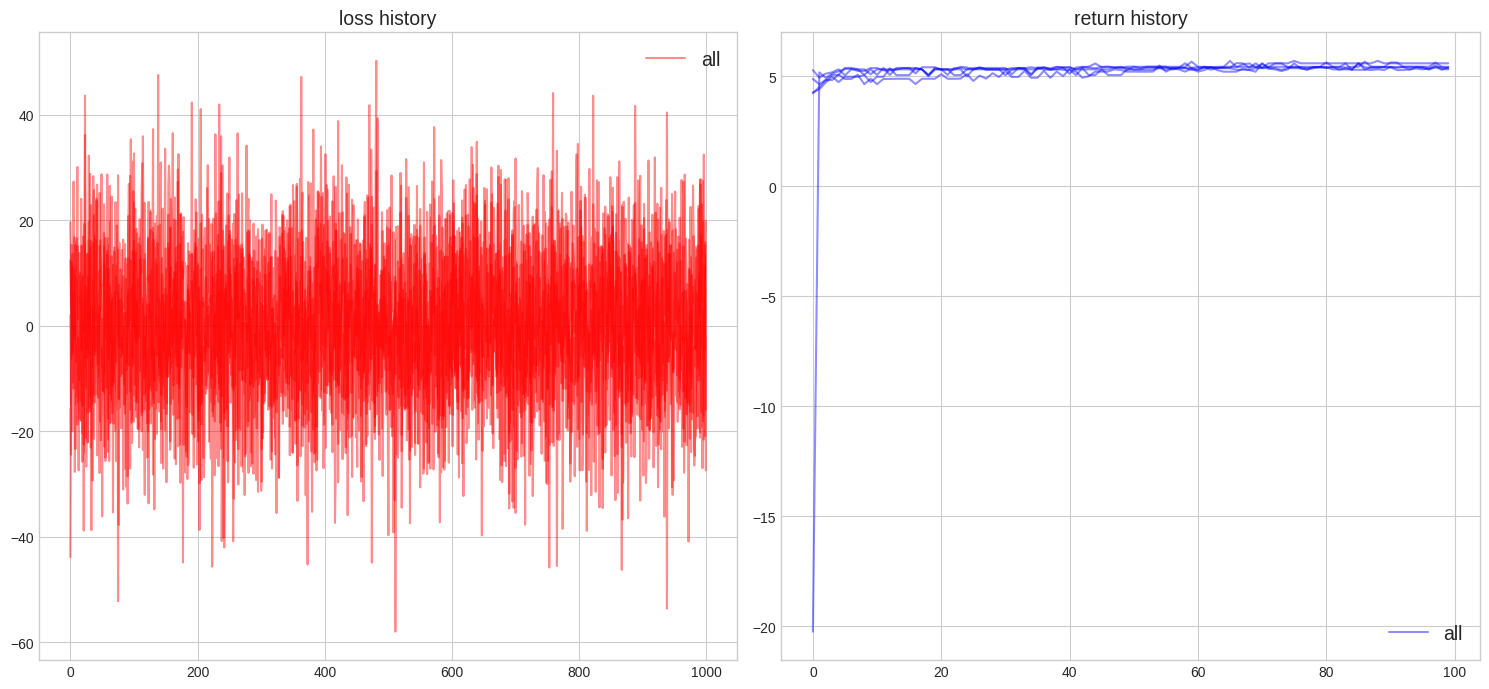

acquired action
action =  [11.452]
action =  [11.662]
action =  [14.111]
action =  [11.059]
action =  [10.867]
action =  [13.138]
action =  [14.296]
action =  [12.258]
action =  [13.698]
action =  [13.564]
total_reward [5.408]
param distribution in model


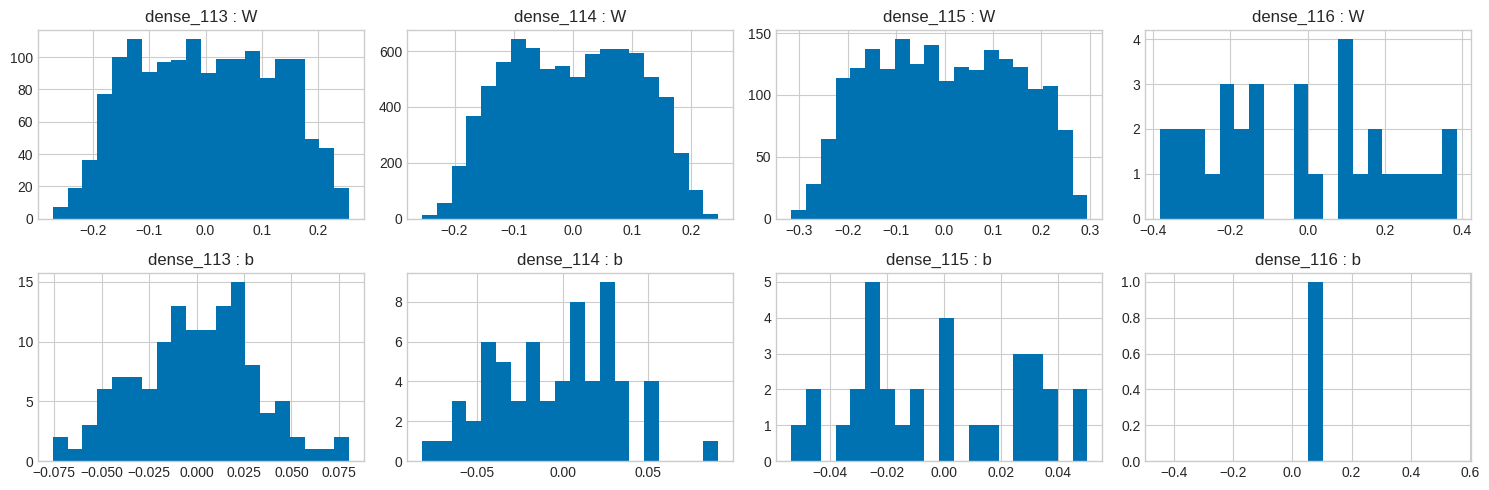

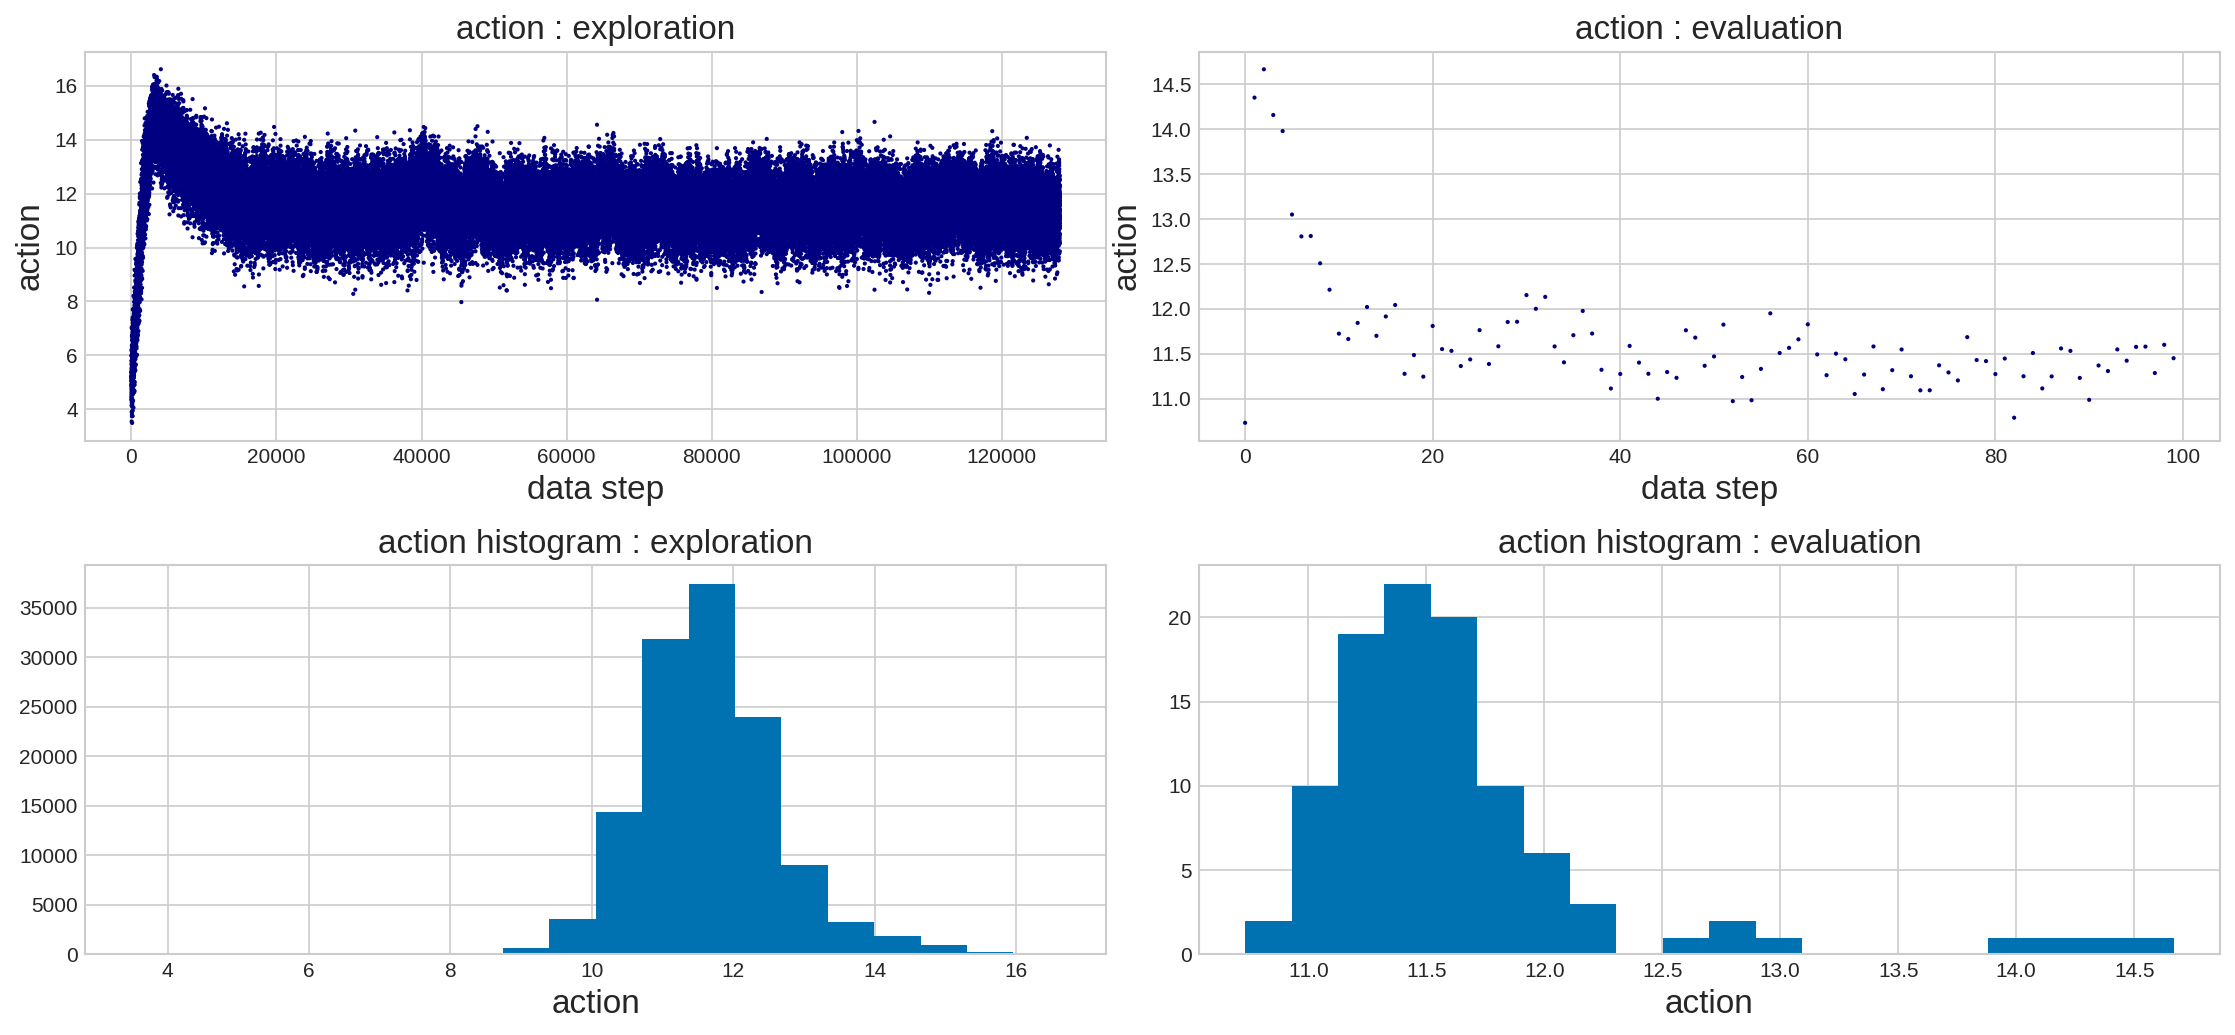

bankrupt=17796, total=640501, ratio=0.0278


In [13]:
import ES
importlib.reload(ES)
from keras import optimizers

action_min = mu_min
action_max = mu_max

model = ES.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                     action_min=action_min, action_max=action_max)

#df = pd.DataFrame()
for lr, eps in itertools.product([1e-2], [1e-2]):
    print('======================================================')
    print('lr={}, eps={}'
          .format(lr, eps))
    tester = ES.Tester(env, model, name='ES_01')
    #n_trials = 3
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_episodes=n_steps // 10, n_samples=64,
                gamma=1.0/(1+hurdle),
                learning_rate_start=lr, learning_rate_end=lr, learning_rate_interval=100,
                epsilon_start=eps, epsilon_end=eps, epsilon_interval=100,
                verbose=False, verbose_interval=100//10, evaluate_interval=100//10, 
                get_log=True)
    
    viz = ES.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x,
                       data_span=10,
                       cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['eps'] = eps
        df_temp['Agent'] = 'ES'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

er=0.5, eps=0.1
start testing... :  2019-11-07 04:30:27.118358
start trial 0/5 trial...


100%|██████████| 1000/1000 [23:13<00:00,  1.39s/it]


start trial 1/5 trial...


100%|██████████| 1000/1000 [23:11<00:00,  1.39s/it]


start trial 2/5 trial...


100%|██████████| 1000/1000 [23:15<00:00,  1.39s/it]


start trial 3/5 trial...


100%|██████████| 1000/1000 [23:22<00:00,  1.38s/it]


start trial 4/5 trial...


100%|██████████| 1000/1000 [23:17<00:00,  1.40s/it]


end testing... :  2019-11-07 06:28:01.358476
loss and reward history


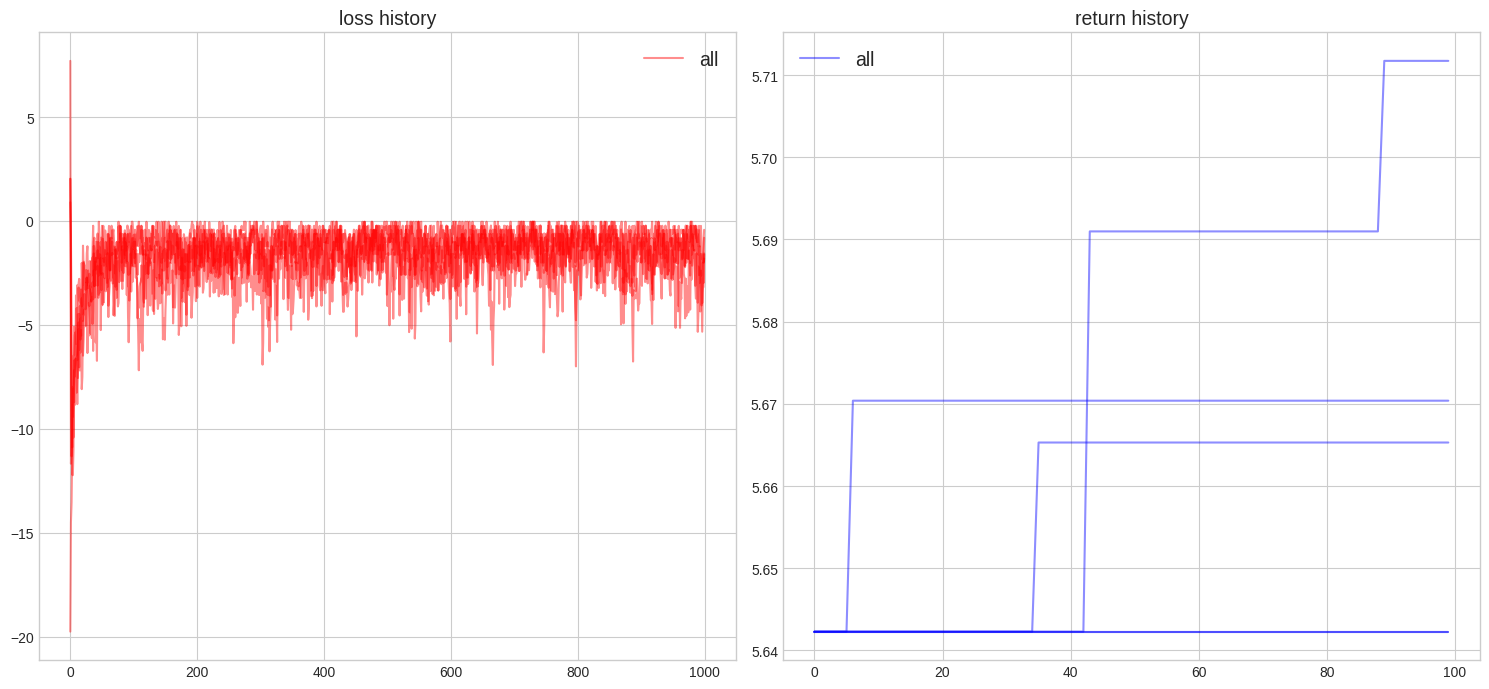

acquired action
action =  [10.471]
action =  [9.82]
action =  [19.055]
action =  [19.972]
action =  [19.137]
action =  [19.814]
action =  [18.608]
action =  [19.922]
action =  [19.253]
action =  [19.847]
total_reward [5.67]
param distribution in model


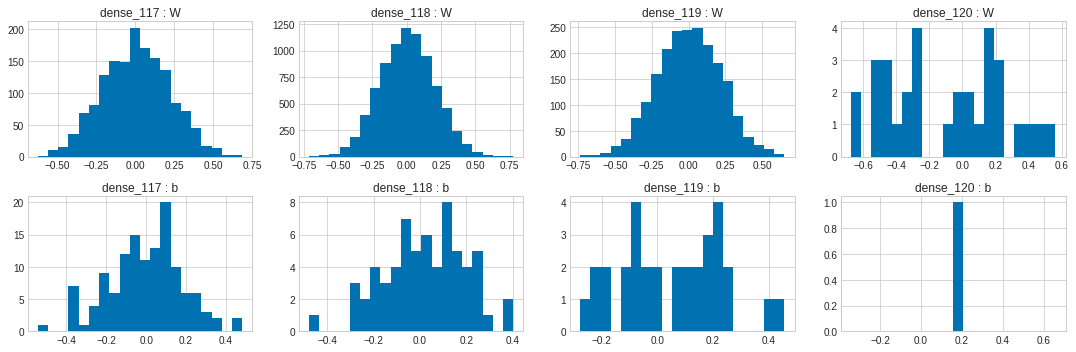

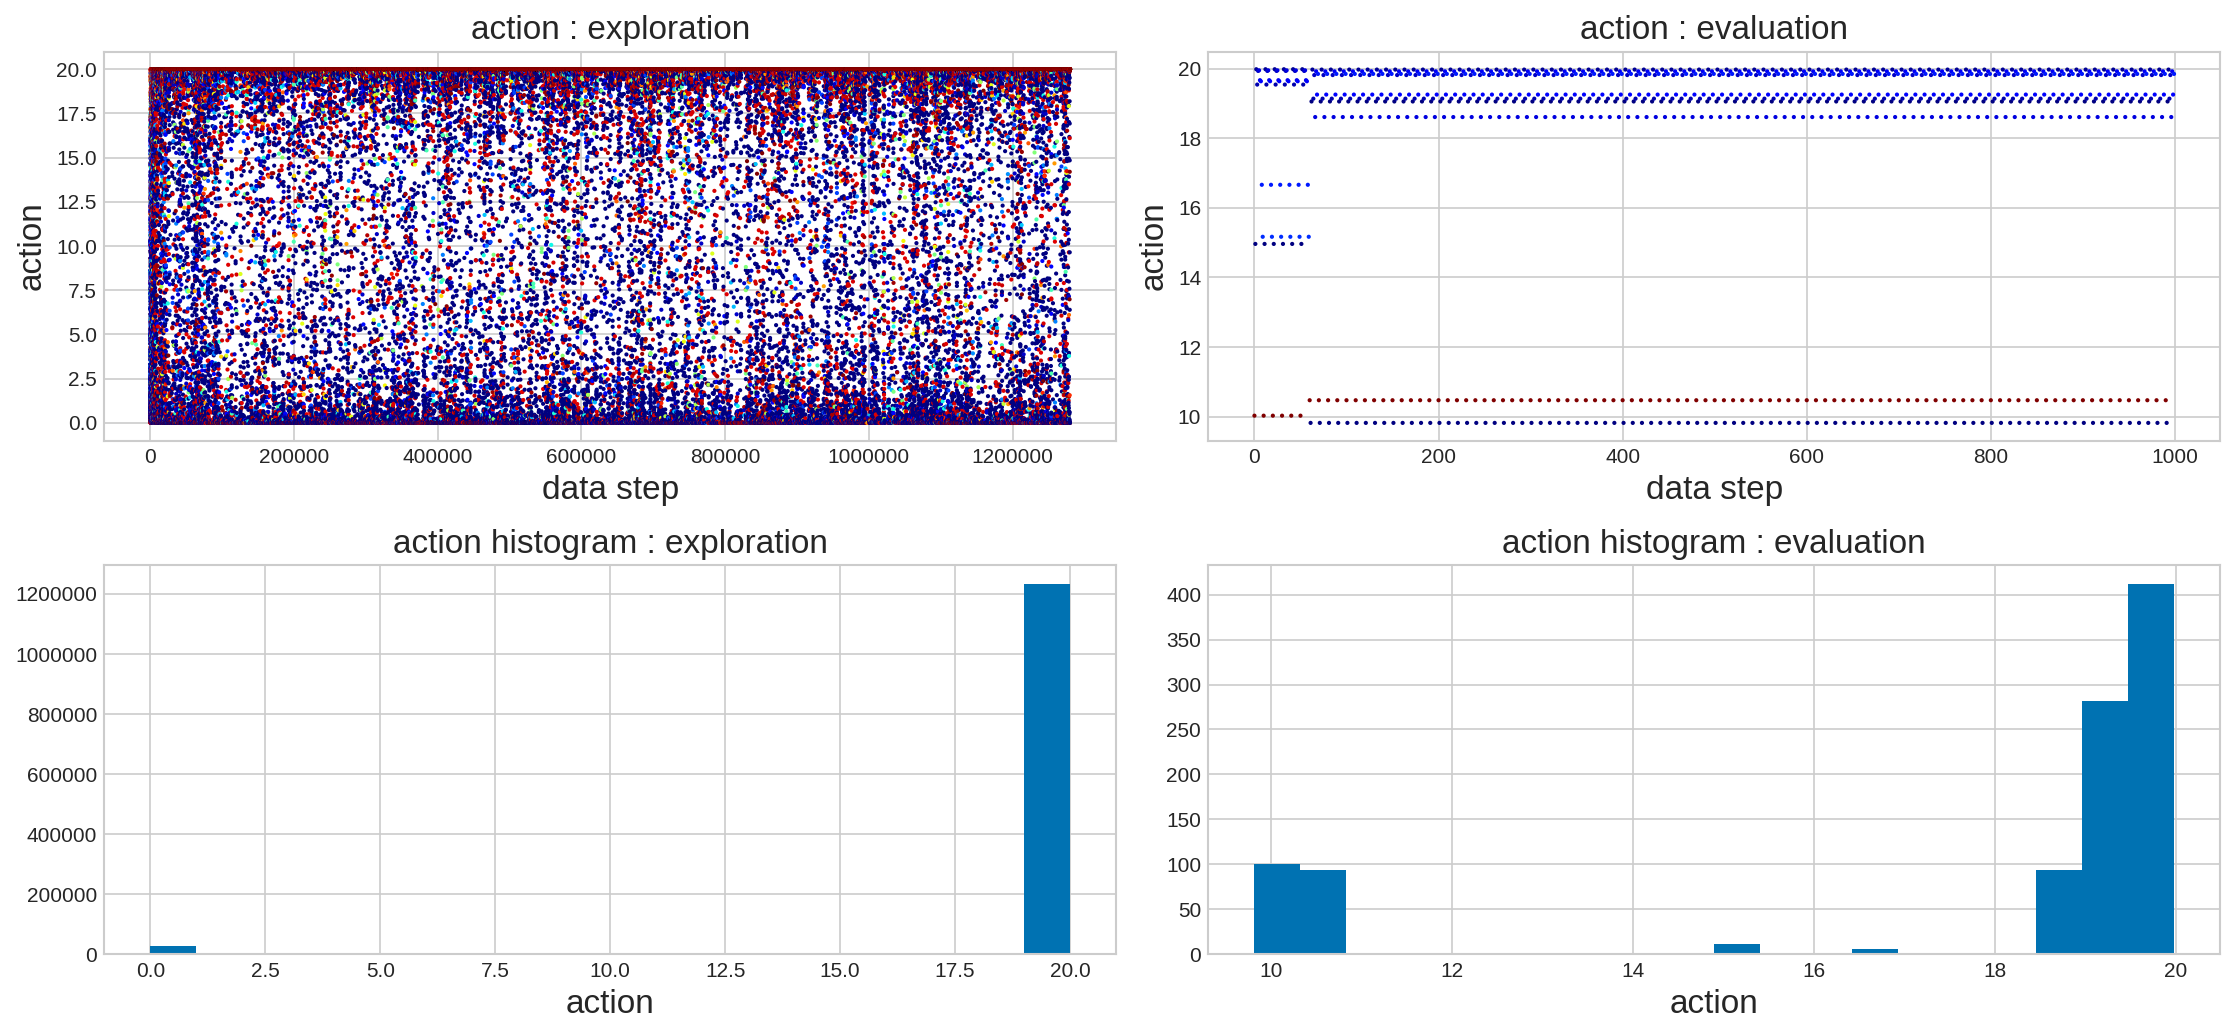

bankrupt=42484, total=640506, ratio=0.0663


In [14]:
import GA
importlib.reload(GA)
from keras import optimizers

action_min = mu_min
action_max = mu_max

model = GA.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                     action_min=action_min, action_max=action_max)

#df = pd.DataFrame()
for er, eps in itertools.product([0.5], [0.1]):
    print('======================================================')
    print('er={}, eps={}'
          .format(er, eps))
    tester = GA.Tester(env, model, name='GA_01')
    #n_trials = 3
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_episodes=n_steps // 10, 
                n_samples=64, ratio_elite=er, 
                gamma=1.0/(1+hurdle),
                epsilon_start=eps, epsilon_end=eps, epsilon_interval=100,
                verbose=False, verbose_interval=100//10, evaluate_interval=100//10, 
                get_log=True)
    
    viz = GA.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x,
                       data_span=1,
                       cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['er'] = er
        #df_temp['eps'] = eps
        df_temp['Agent'] = 'GA'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

---
## 3. Results

In [15]:
pd.options.display.precision = 4
ids = ['Agent',]
df[df['t'].max()*0.9<=df['t']].groupby(ids)['return'].describe()

count     mean         std      min      25%      50%  \
Agent                                                                   
A2C_continuous   50.0   4.0330  3.5888e-15   4.0330   4.0330   4.0330   
A2C_discrete     50.0   5.6988  1.2210e-01   5.4464   5.7142   5.7624   
AWR              50.0  -5.5421  1.3083e+01 -21.5310 -21.2796   4.0330   
DDPG             50.0  -0.2912  9.9924e+00 -20.0917   4.0330   4.7089   
DQN              50.0   4.1042  5.4137e-02   4.0330   4.0440   4.1188   
ES               50.0   5.4457  1.0566e-01   5.2873   5.3749   5.4319   
GA               50.0   5.6664  2.5693e-02   5.6423   5.6423   5.6653   
NAF              50.0 -20.2702  1.2604e-01 -20.4549 -20.3790 -20.2486   

                    75%      max  
Agent                             
A2C_continuous   4.0330   4.0330  
A2C_discrete     5.7697   5.7722  
AWR              5.4799   5.5561  
DDPG             4.8494   4.9923  
DQN              4.1384   4.1962  
ES               5.5703   5.6323  
GA               5.6704   5.7117  
NAF            -20.1692 -20.1100

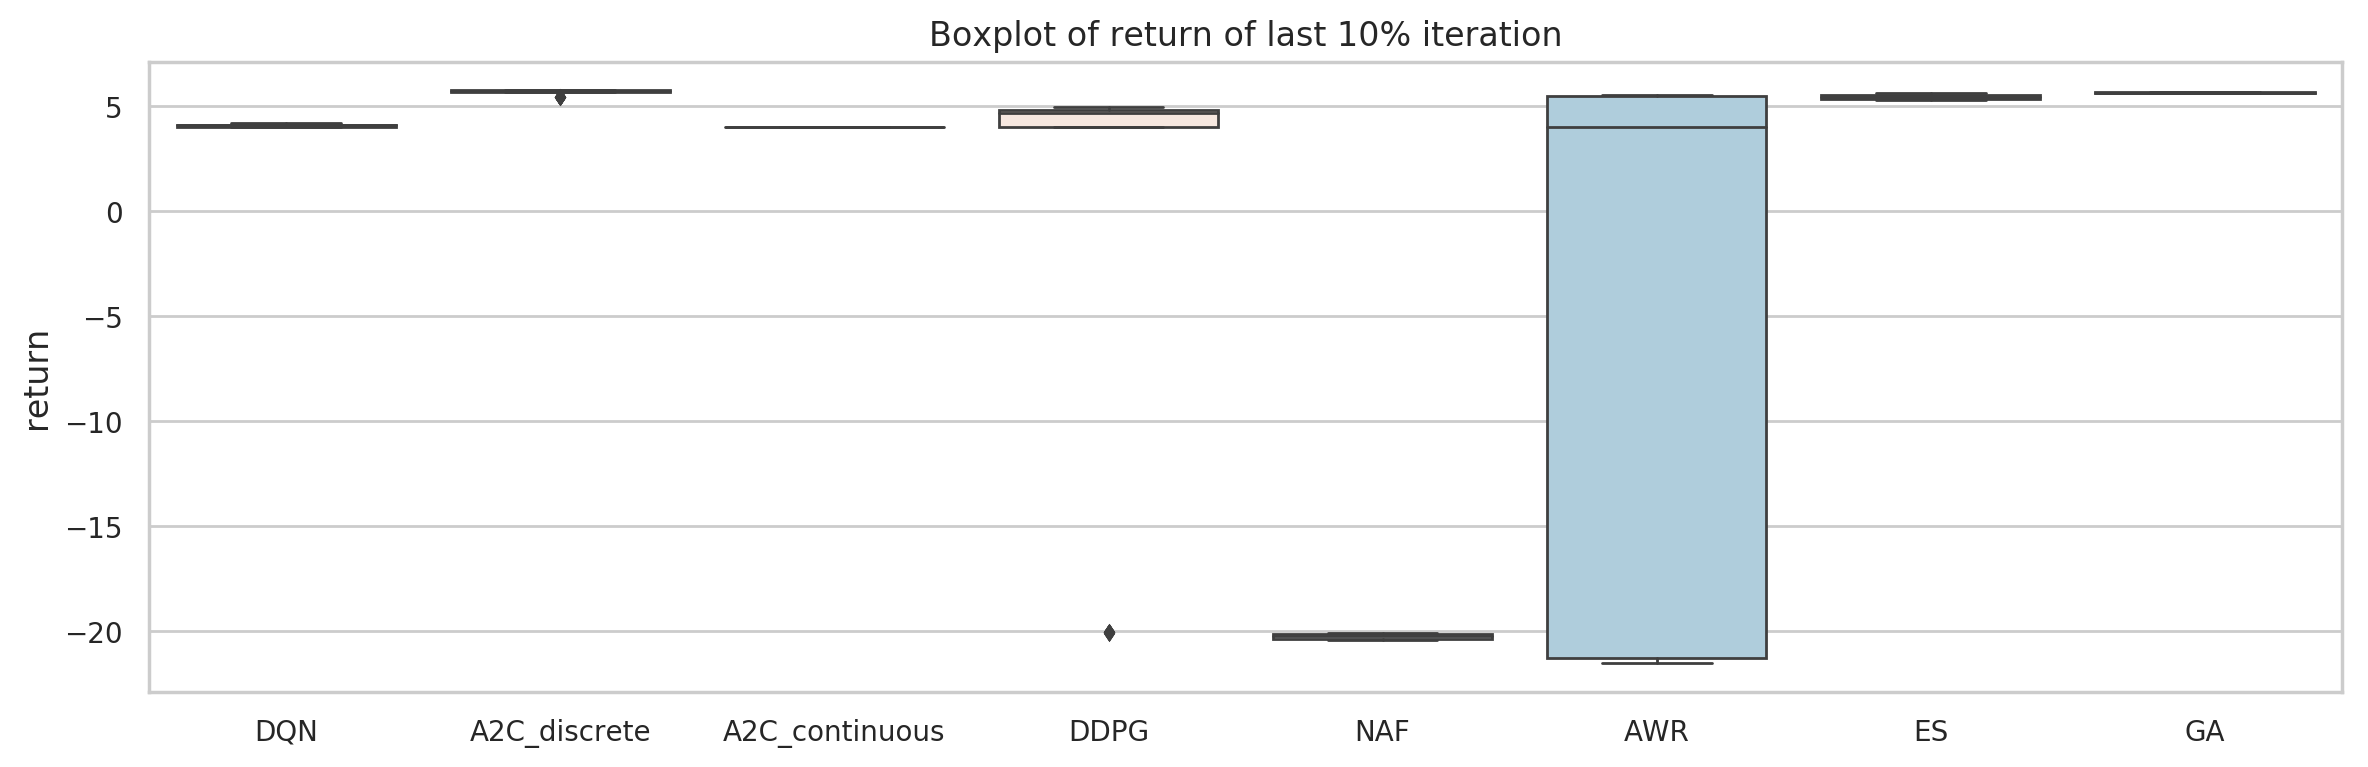

In [16]:
sns.set_style("whitegrid")
sns.set_context("notebook")

plt.figure(figsize=(12, 4), dpi=200)

sns.boxplot(data=df[df['t'].max()*0.9<=df['t']], x='Agent', y='return', orient='v', fliersize=3.0, linewidth=1.0, palette='RdBu')

plt.title('Boxplot of return of last 10% iteration', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('return', fontsize=12)
plt.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

/home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


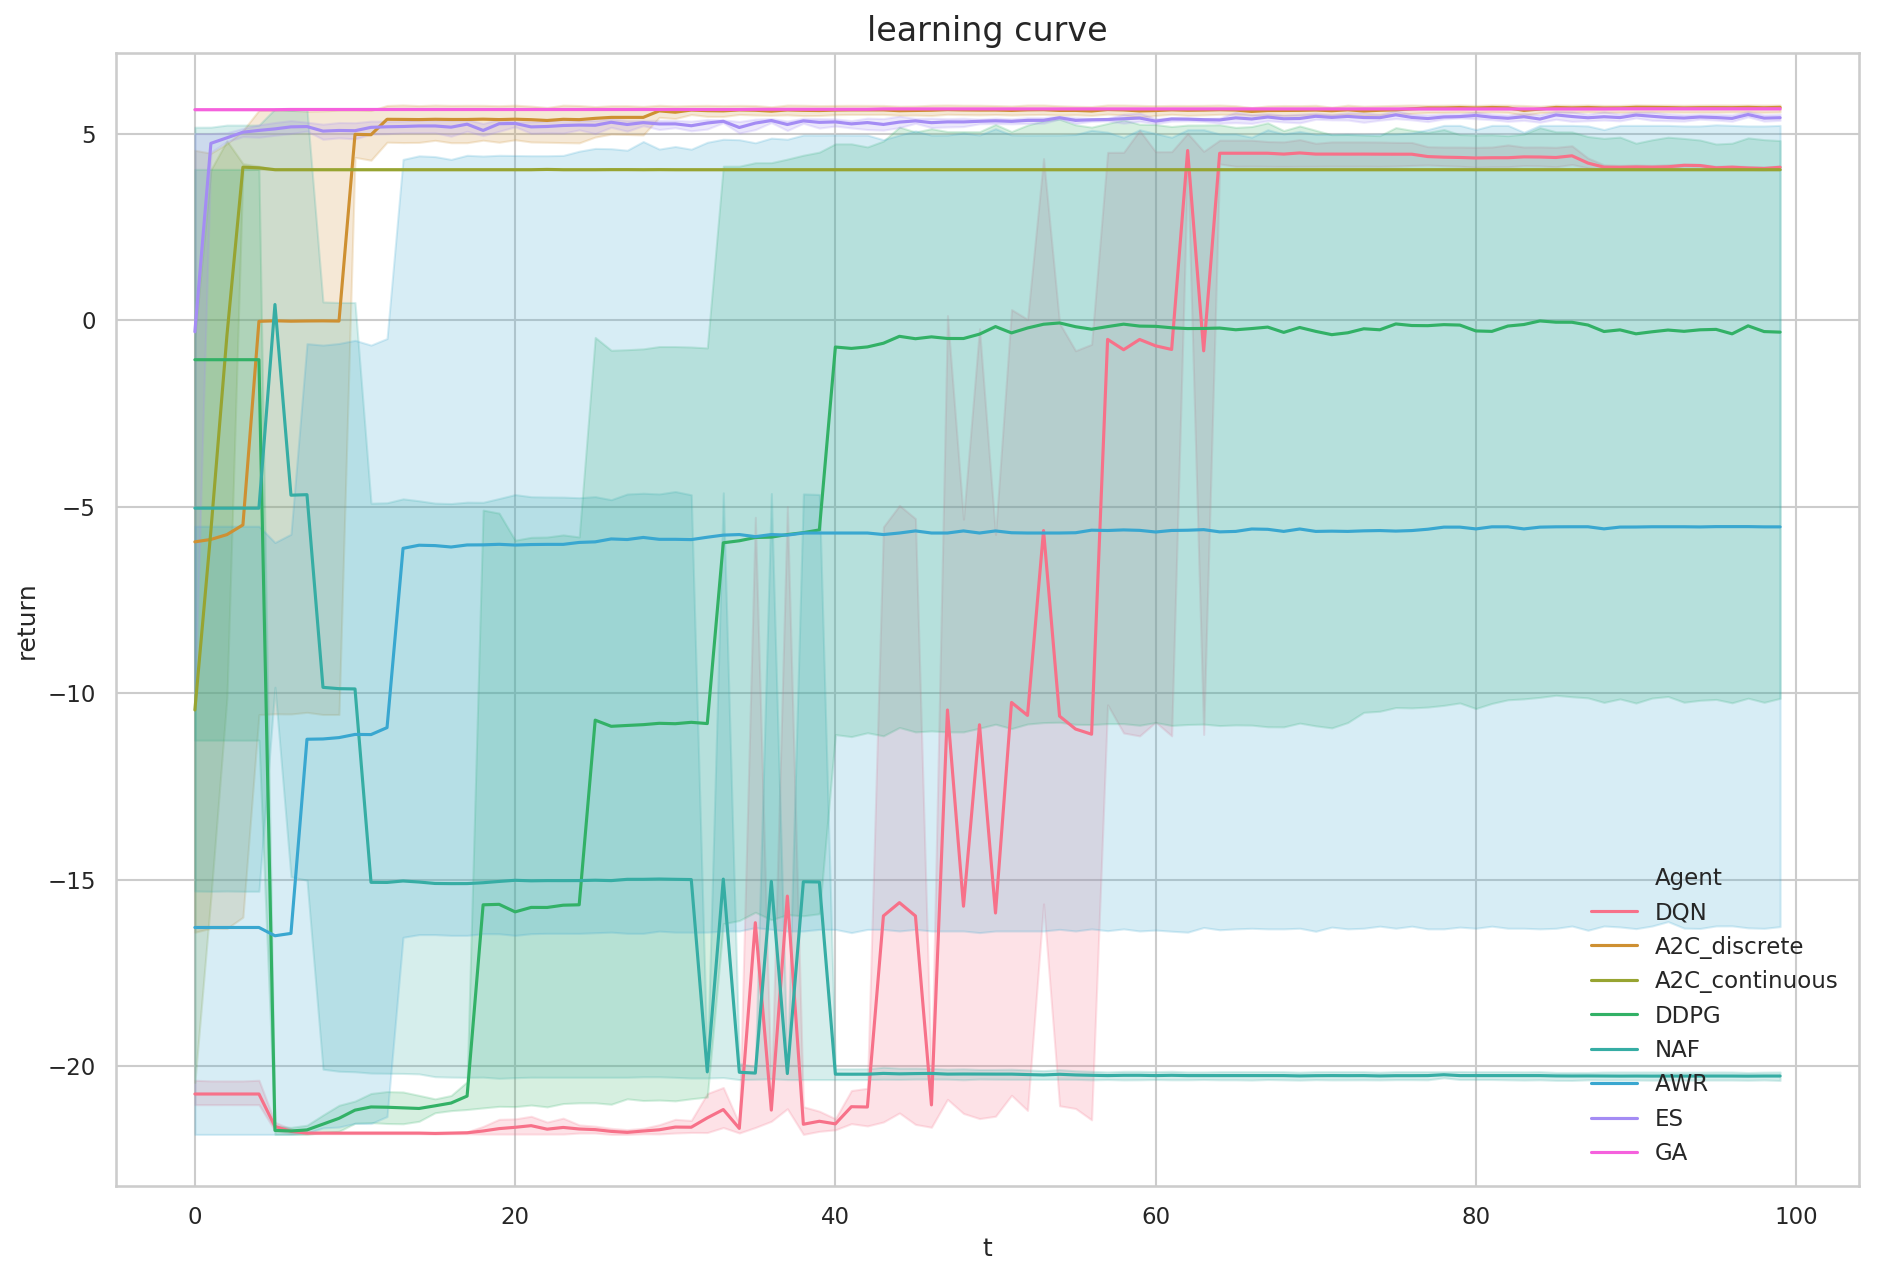

In [17]:
fig = plt.figure(figsize=(15, 10), dpi=150)
sns.lineplot(x='t', y='return', hue='Agent', data=df)
plt.title('learning curve', size=16)
plt.show()